# COMPARE HSP2 TO HSPF USING CALLEG

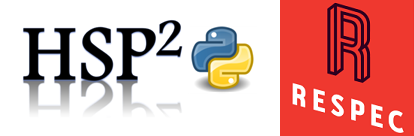

Copyright 2020 for this Jupyter Notebook and YouTube Video by RESPEC, INC.  All rights reserved.

$\textbf{HSP}^{\textbf{2}}\ \text{and}\ \textbf{HSP2}\ $ Copyright 2020 by RESPEC INC. and released under the *GNU AFFERO GENERAL PUBLIC LICENSE*

This Notebook will compare the results of running HSPF and HSP$^2$ for the basic hydrology (PWATER, IWATER, and HYDR) to confirm the proper calculations of HSP$^2$

Calleg is a real watershed and has
+ 27 IMPLND segments,
+ 129 PERLND segments,
+ 119 RCHRES segments,
+ 9 years of simulation time with hourly time steps (78,888 timesteps) from 1993-10-01 to 2002-10-01

This Notebook assumes HSPF has been run and the HBN data saved to an HDF5 file in the **HSPF RUN** directory.

## Required Python imports  and setup

In [1]:
import os

import pandas as pd
from matplotlib import pyplot as plt

# Set display options for convenience, does't change the data
pd.options.display.max_rows = 150
pd.options.display.max_columns = 20
pd.options.display.float_format = (
    "{:.4f}".format
)  # display 4 digits after the decimal point

%matplotlib inline

from hsp2.hsp2 import main, versions
from hsp2.hsp2tools import readUCI, readWDM

versions(["matplotlib"])

version
name                                                         
Python      3.10.14 | packaged by conda-forge | (main, Mar...
HSP2                                                      n/a
numpy                                                  1.26.4
numba                                                  0.59.1
pandas                                                  1.5.3
matplotlib                                              3.8.4
os              Linux-5.15.0-91-generic-x86_64-with-glibc2.35
processor                                              x86_64
Date/Time                          2024-05-21T15:24:42.714868

Convenient name strings to get to the data

In [2]:
wdmname = "calleg.wdm"
uciname = "calleg.uci"
HBN = "hspf.h5"
hdfname = "calleg_hsp2_devWDM.h5"

## Run HSP2 on the calleg

### Create HDF5 file

In [3]:
%time
readUCI(uciname, hdfname)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 3.1 µs


In [4]:
%time
readWDM(wdmname, hdfname)

CPU times: user 1 µs, sys: 0 ns, total: 1 µs
Wall time: 2.15 µs
401 reading from wdm
402 reading from wdm
403 reading from wdm
404 reading from wdm
405 reading from wdm
406 reading from wdm
407 reading from wdm
408 reading from wdm
301 reading from wdm
322 reading from wdm
303 reading from wdm
304 reading from wdm
305 reading from wdm
306 reading from wdm
307 reading from wdm
312 reading from wdm
313 reading from wdm
1802 reading from wdm
1005 reading from wdm
1011 reading from wdm
776 reading from wdm
780 reading from wdm
781 reading from wdm
782 reading from wdm
800 reading from wdm
802 reading from wdm
803 reading from wdm
805 reading from wdm
806 reading from wdm
841 reading from wdm
778 reading from wdm
830 reading from wdm
831 reading from wdm
832 reading from wdm
833 reading from wdm
834 reading from wdm
836 reading from wdm
838 reading from wdm
839 reading from wdm
1169 reading from wdm
1171 reading from wdm
1239 reading from wdm
1000 reading from wdm
49 reading from wdm
141 re

Start                 Stop Freq  Length TSTYPE  \
TS401   1987-01-01 00:00:00  2004-01-01 00:00:00  1MS     204   PUMP   
TS402   1987-01-01 00:00:00  2004-01-01 00:00:00  1MS     204   PUMP   
TS403   1987-01-01 00:00:00  2004-01-01 00:00:00  1MS     204   PUMP   
TS404   1987-01-01 00:00:00  2004-01-01 00:00:00  1MS     204   PUMP   
TS405   1987-01-01 00:00:00  2004-01-01 00:00:00  1MS     204   PUMP   
...                     ...                  ...  ...     ...    ...   
TS9204  1987-01-01 00:00:00  2003-01-01 00:00:00   1D    5844   AGWO   
TS9911  1987-01-01 00:00:00  2003-01-01 00:00:00   1D    5844   FLOW   
TS9403  1987-01-01 00:00:00  2003-01-01 00:00:00   1D    5844   IFWO   
TS9409  1987-01-01 00:00:00  2003-01-01 00:00:00   1h  140256   WPPT   
TS9802  1987-01-01 00:00:00  2003-01-01 00:00:00   1D    5844   SURO   

           TFILL                                             STNAM  SCENARIO  \
TS401  -999.0000            Cumulative Flow of 6 Downtown GW Wells  OBSERVED   
TS402  -999.0000  Flow of GW pumped into storm drain by Pump #31 i  OBSERVED   
TS403  -999.0000   Flow of GW pumped into storm drain @ 2020 First  OBSERVED   
TS404  -999.0000  Flow of GW pumped into storm drain @ Chain Dr in  OBSERVED   
TS405  -999.0000  Flow of GW pumped into storm drain @ Madera in S  OBSERVED   
...          ...                                               ...       ...   
TS9204 -999.0000                                                      CALLEG   
TS9911 -999.0000                                                      CALLEG   
TS9403 -999.0000                                                      CALLEG   
TS9409 -999.0000                                                      CALLEG   
TS9802 -999.0000                                                      CALLEG   

       CONSTITUENT  LOCATION  
TS401      PUMPOUT  DOWNTOWN  
TS402      PUMPOUT  PUMP_#31  
TS403       PUMPIN  2020_1ST  
TS404       PUMPIN  CHAIN_DR  
TS405       PUMPIN    MADERA  
...            ...       ...  
TS9204        AGWO    MADERA  
TS9911        FLOW  ARROY838  
TS9403        IFWO   REVOLON  
TS9409        WPPT   REVOLON  
TS9802        SURO  BEARDSLY  

[235 rows x 10 columns]

### Run

Using profiler

Normal run

In [5]:
main(hdfname, saveall=True)

2024-05-21 15:25:07.54   Processing started for file calleg_hsp2_devWDM.h5; saveall=True
STATE initializing contexts.
Looking for custom om loader in python code  calleg_hsp2_devWDM.py
Looking for custom om json  calleg_hsp2_devWDM.json
Loaded objects & paths: insures all paths are valid, connects models as inputs
Tokenizing models
Operational model status: enabled
op_tokens has 2394 elements, with  1 executable elements
2024-05-21 15:25:12.27   Simulation Start: 1993-10-01 00:00:00, Stop: 2002-10-01 00:00:00
2024-05-21 15:25:12.27      PERLND P011 DELT(minutes): 60
2024-05-21 15:25:12.60         PWATER
2024-05-21 15:25:13.69      PERLND P012 DELT(minutes): 60
2024-05-21 15:25:13.70         PWATER
2024-05-21 15:25:14.01      PERLND P013 DELT(minutes): 60
2024-05-21 15:25:14.01         PWATER
2024-05-21 15:25:14.32      PERLND P014 DELT(minutes): 60
2024-05-21 15:25:14.32         PWATER
2024-05-21 15:25:14.63      PERLND P015 DELT(minutes): 60
2024-05-21 15:25:14.64         PWATER
2024-

## Read Summary from HBN file

Find the higest frequency data available.

In [6]:
summary = pd.read_hdf(HBN, "SUMMARY")
summary.Frequency.unique()

array(['Monthly', 'Yearly'], dtype=object)

So the best available is monthly data.

## Automate checking by output flow

In [7]:
def hsp2key(hspfkey):
    op, activity, segment, _ = hspfkey.split("_")
    return f"RESULTS/{op}_{op[0]}{segment:0>3s}/{activity}"

In [8]:
def monthlyoutflow(keys, flowname, how="sum"):
    concat = []
    for key in keys.index:
        hsp2 = (
            pd.read_hdf(hdfname, hsp2key(key))[flowname].resample("M").sum().to_numpy()
        )
        hspf_flowname = flowname.split("_")[0]
        hspf = pd.read_hdf(HBN, key)[hspf_flowname].to_numpy()

        hsp2sum = hsp2.sum()
        hspfsum = hspf.sum()

        segment = key.split("_")[2]

        data = pd.DataFrame(index=[segment])
        data["HSP2_SUM"] = hsp2sum
        data["HSPF_SUM"] = hspfsum
        data["Percent diff"] = 100 * (hspfsum - hsp2sum) / hspfsum
        data["abs(Percent diff)"] = 100 * abs(hspfsum - hsp2sum) / hspfsum

        concat.append(data)

    return pd.concat(concat).sort_values(by=["abs(Percent diff)"])

### Define a function to plot HSPF and HSP2 data

In [9]:
def plot(operation, ils, activity, name, how="sum"):
    hspf = f"{operation}_{activity}_{ils:0>3s}_4"
    hspf_flowname = name.split("_")[0]
    tshspf = pd.read_hdf(HBN, hspf)[hspf_flowname]

    hsp2 = f"RESULTS/{operation}_{operation[0]}{ils:0>3s}/{activity}"
    if how == "sum":
        tshsp2 = (
            pd.read_hdf(hdfname, hsp2)[f"{name}_{how}"]
            .resample("M")
            .sum()
            .shift(1, "D")
        )
    elif how == "last":
        tshsp2 = (
            pd.read_hdf(hdfname, hsp2)[f"{name}_{how}"]
            .resample("M")
            .last()
            .shift(1, "D")
        )

    plt.figure(figsize=(10, 8))
    plt.plot(tshspf.index, tshspf, label="HSPF", color="salmon", lw=4)
    plt.plot(tshsp2.index, tshsp2, label="HSP2", color="b", lw=1, linestyle="dashed")
    plt.legend()
    plt.title(f"{operation} {operation[0]}{ils:0>3s}, {activity} {name}")

In [10]:
def scatter(operation, ils, activity, name, how="sum"):
    hspf = f"{operation}_{activity}_{ils:0>3s}_4"
    tshspf = pd.read_hdf(HBN, hspf)[name]

    hsp2 = f"RESULTS/{operation}_{operation[0]}{ils:0>3s}/{activity}"
    if how == "sum":
        tshsp2 = (
            pd.read_hdf(hdfname, hsp2)[f"{name}_{how}"]
            .resample("M")
            .sum()
            .shift(1, "D")
        )
    elif how == "last":
        tshsp2 = (
            pd.read_hdf(hdfname, hsp2)[f"{name}_{how}"]
            .resample("M")
            .last()
            .shift(1, "D")
        )

    plt.scatter(tshspf, tshsp2[: len(tshspf)])

### IMPLND

In [11]:
implndkeys = summary[(summary.Frequency == "Monthly") & (summary.Operation == "IMPLND")]
implndkeys

Operation Activity segment Frequency     Shape      Start  \
IMPLND_IWATER_011_4    IMPLND   IWATER      11   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_021_4    IMPLND   IWATER      21   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_041_4    IMPLND   IWATER      41   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_051_4    IMPLND   IWATER      51   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_061_4    IMPLND   IWATER      61   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_071_4    IMPLND   IWATER      71   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_081_4    IMPLND   IWATER      81   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_101_4    IMPLND   IWATER     101   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_111_4    IMPLND   IWATER     111   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_121_4    IMPLND   IWATER     121   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_131_4    IMPLND   IWATER     131   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_141_4    IMPLND   IWATER     141   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_151_4    IMPLND   IWATER     151   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_161_4    IMPLND   IWATER     161   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_171_4    IMPLND   IWATER     171   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_181_4    IMPLND   IWATER     181   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_191_4    IMPLND   IWATER     191   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_201_4    IMPLND   IWATER     201   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_211_4    IMPLND   IWATER     211   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_221_4    IMPLND   IWATER     221   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_231_4    IMPLND   IWATER     231   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_241_4    IMPLND   IWATER     241   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_251_4    IMPLND   IWATER     251   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_271_4    IMPLND   IWATER     271   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_281_4    IMPLND   IWATER     281   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_291_4    IMPLND   IWATER     291   Monthly  (108, 6) 1993-11-01   
IMPLND_IWATER_301_4    IMPLND   IWATER     301   Monthly  (108, 6) 1993-11-01   

                          Stop  
IMPLND_IWATER_011_4 2002-10-01  
IMPLND_IWATER_021_4 2002-10-01  
IMPLND_IWATER_041_4 2002-10-01  
IMPLND_IWATER_051_4 2002-10-01  
IMPLND_IWATER_061_4 2002-10-01  
IMPLND_IWATER_071_4 2002-10-01  
IMPLND_IWATER_081_4 2002-10-01  
IMPLND_IWATER_101_4 2002-10-01  
IMPLND_IWATER_111_4 2002-10-01  
IMPLND_IWATER_121_4 2002-10-01  
IMPLND_IWATER_131_4 2002-10-01  
IMPLND_IWATER_141_4 2002-10-01  
IMPLND_IWATER_151_4 2002-10-01  
IMPLND_IWATER_161_4 2002-10-01  
IMPLND_IWATER_171_4 2002-10-01  
IMPLND_IWATER_181_4 2002-10-01  
IMPLND_IWATER_191_4 2002-10-01  
IMPLND_IWATER_201_4 2002-10-01  
IMPLND_IWATER_211_4 2002-10-01  
IMPLND_IWATER_221_4 2002-10-01  
IMPLND_IWATER_231_4 2002-10-01  
IMPLND_IWATER_241_4 2002-10-01  
IMPLND_IWATER_251_4 2002-10-01  
IMPLND_IWATER_271_4 2002-10-01  
IMPLND_IWATER_281_4 2002-10-01  
IMPLND_IWATER_291_4 2002-10-01  
IMPLND_IWATER_301_4 2002-10-01

In [12]:
delta = monthlyoutflow(implndkeys, "SURO_sum")
delta

HSP2_SUM  HSPF_SUM  Percent diff  abs(Percent diff)
131  126.2947  126.2947       -0.0000             0.0000
121  126.2947  126.2947       -0.0000             0.0000
241  120.2066  120.2066        0.0000             0.0000
291  117.5699  117.5699       -0.0000             0.0000
281  137.7904  137.7904        0.0000             0.0000
101  144.1288  144.1288       -0.0000             0.0000
111  126.0203  126.0203       -0.0000             0.0000
141  116.0249  116.0249       -0.0000             0.0000
021  122.5966  122.5966        0.0000             0.0000
191  125.6937  125.6937       -0.0000             0.0000
041  141.2890  141.2890        0.0000             0.0000
271  136.4228  136.4228        0.0000             0.0000
201  172.5608  172.5608       -0.0000             0.0000
221  126.6460  126.6460        0.0000             0.0000
071  132.6849  132.6849        0.0000             0.0000
161  131.2695  131.2695        0.0000             0.0000
211  125.3008  125.3008       -0.0000             0.0000
011  131.6821  131.6821        0.0000             0.0000
151  133.6036  133.6036        0.0000             0.0000
061  133.6036  133.6036        0.0000             0.0000
171  115.9610  115.9610        0.0000             0.0000
181  115.9610  115.9610        0.0000             0.0000
231  135.5890  135.5890        0.0000             0.0000
081  118.7938  118.7938       -0.0000             0.0000
251  116.6337  116.6337       -0.0000             0.0000
051  120.2708  120.2708       -0.0000             0.0000
301  119.8081  119.8081       -0.0000             0.0000

Look at the statistics for the percent difference column

In [13]:
delta.describe()

HSP2_SUM  HSPF_SUM  Percent diff  abs(Percent diff)
count   27.0000   27.0000       27.0000            27.0000
mean   128.5445  128.5445        0.0000             0.0000
std     12.0012   12.0012        0.0000             0.0000
min    115.9610  115.9610       -0.0000             0.0000
25%    120.0074  120.0074       -0.0000             0.0000
50%    126.2947  126.2947        0.0000             0.0000
75%    133.6036  133.6036        0.0000             0.0000
max    172.5608  172.5608        0.0000             0.0000

<Axes: >

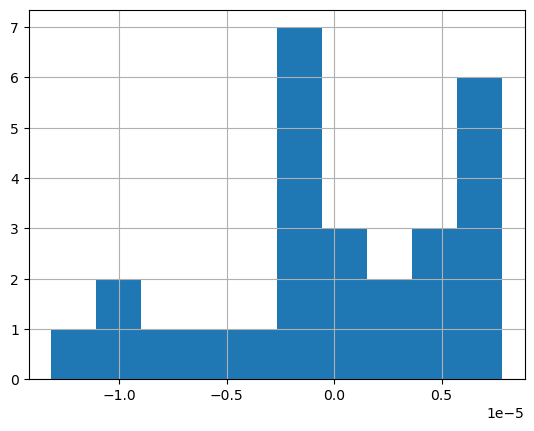

In [14]:
delta["Percent diff"].hist()

In [15]:
ils = delta.index[-1]
print("WORST IMPLND SEGMENT IS", ils)

WORST IMPLND SEGMENT IS 301


#### IMPLND IWATER SURO, Monthly

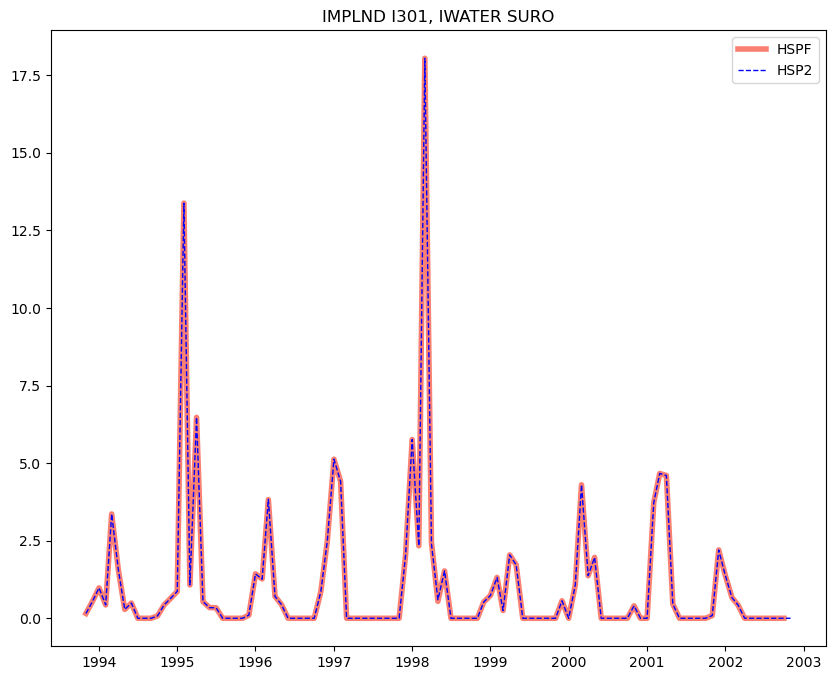

In [16]:
plot("IMPLND", ils, "IWATER", "SURO", "sum")

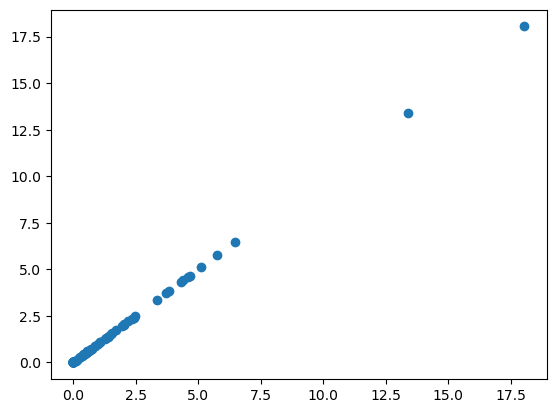

In [17]:
scatter("IMPLND", ils, "IWATER", "SURO", "sum")

#### IMPLND IWATER IMPEV, Monthly

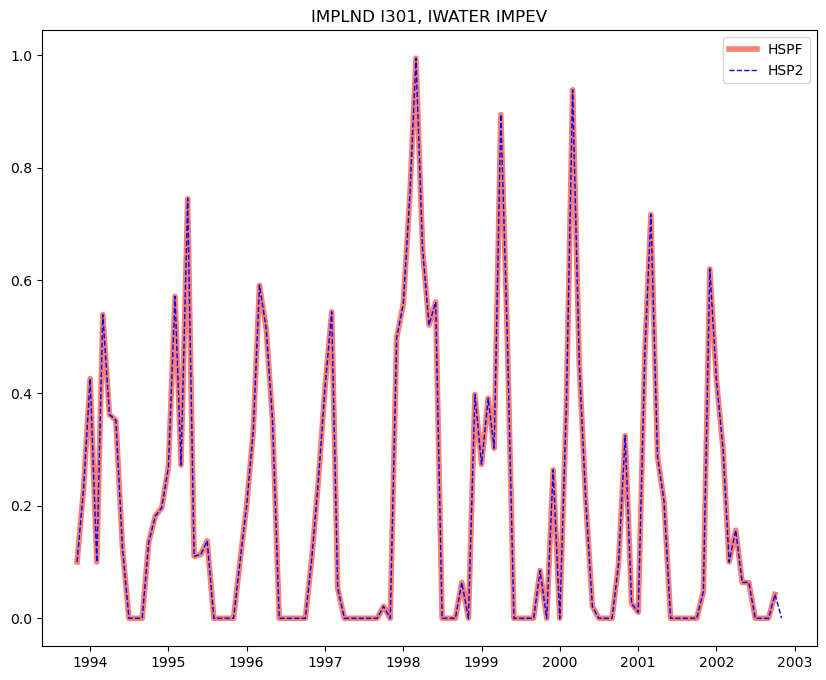

In [18]:
plot("IMPLND", ils, "IWATER", "IMPEV", "sum")

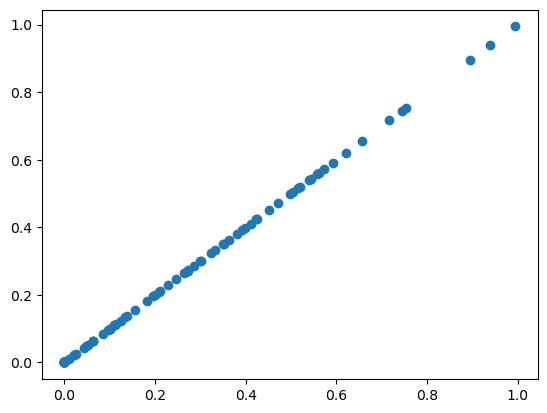

In [19]:
scatter("IMPLND", ils, "IWATER", "IMPEV", "sum")

#### IMPLND IWATER PET, Monthly

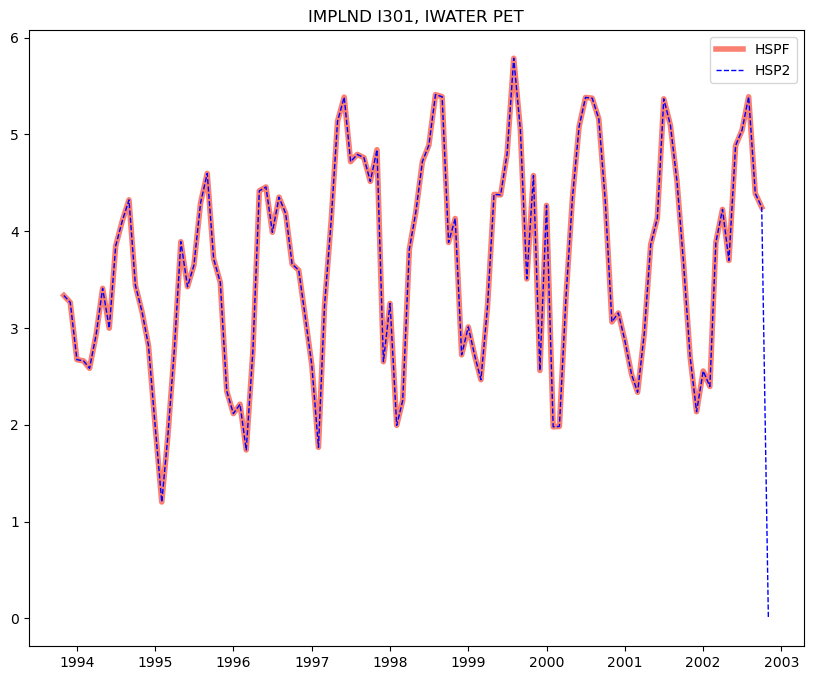

In [20]:
plot("IMPLND", ils, "IWATER", "PET", "sum")

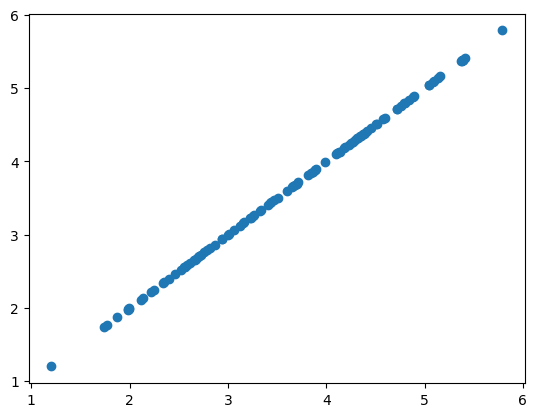

In [21]:
scatter("IMPLND", ils, "IWATER", "PET", "sum")

#### IMPLND IWATER RETS, Monthly

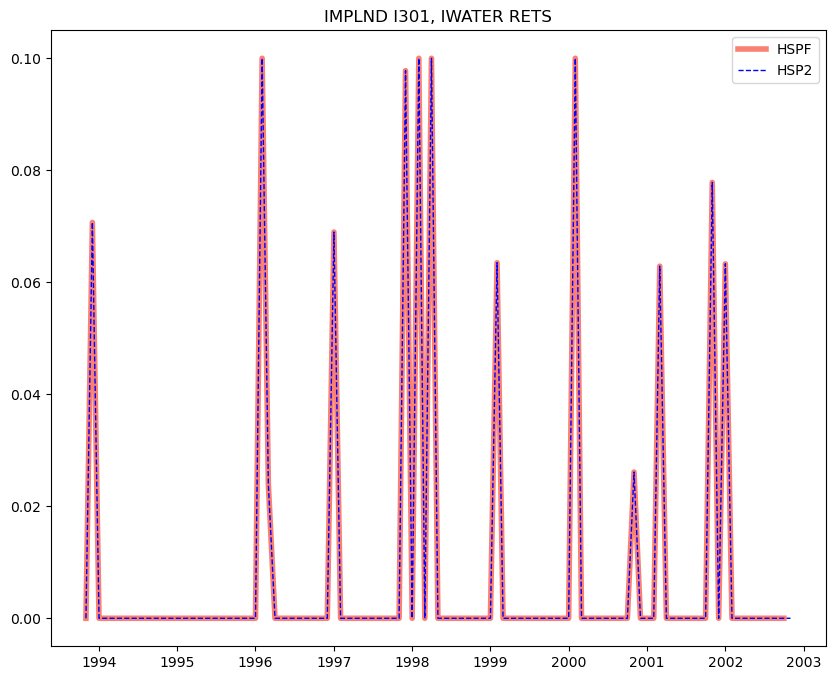

In [22]:
plot("IMPLND", ils, "IWATER", "RETS", "last")

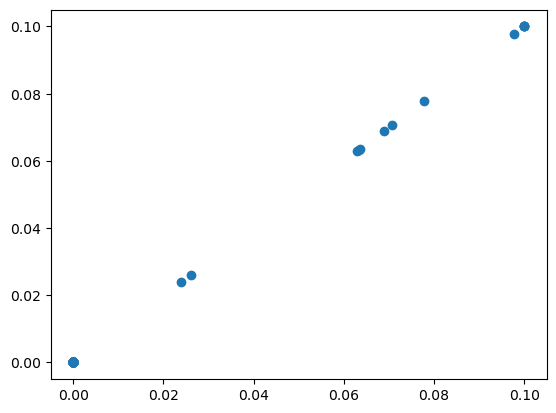

In [23]:
scatter("IMPLND", ils, "IWATER", "RETS", "last")

#### IMPLND IWATER SUPY, Monthly

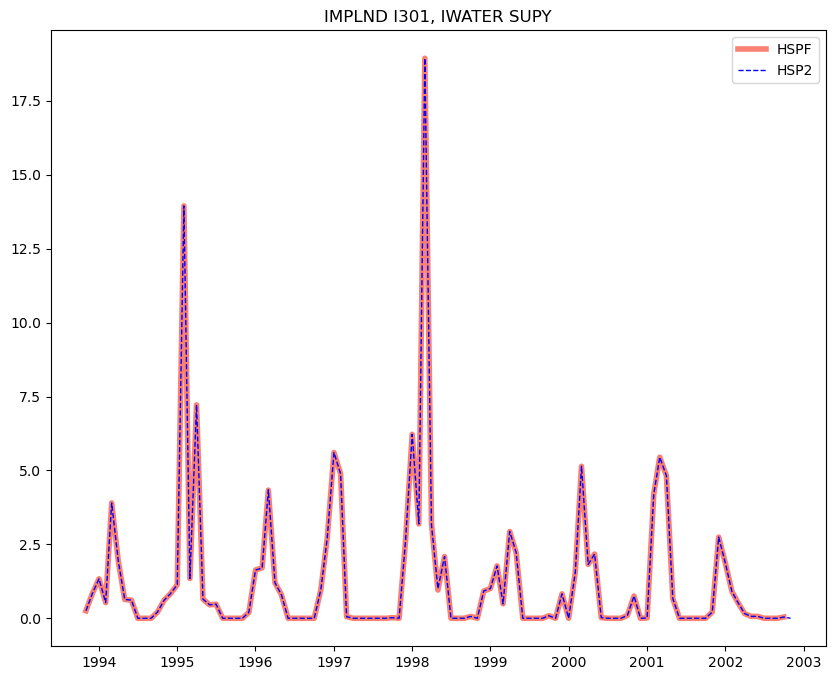

In [24]:
plot("IMPLND", ils, "IWATER", "SUPY", "sum")

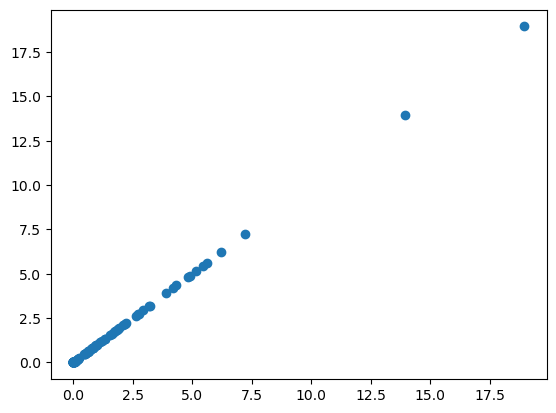

In [25]:
scatter("IMPLND", ils, "IWATER", "SUPY", "sum")

#### IMPLND IWATER SURS, Monthly

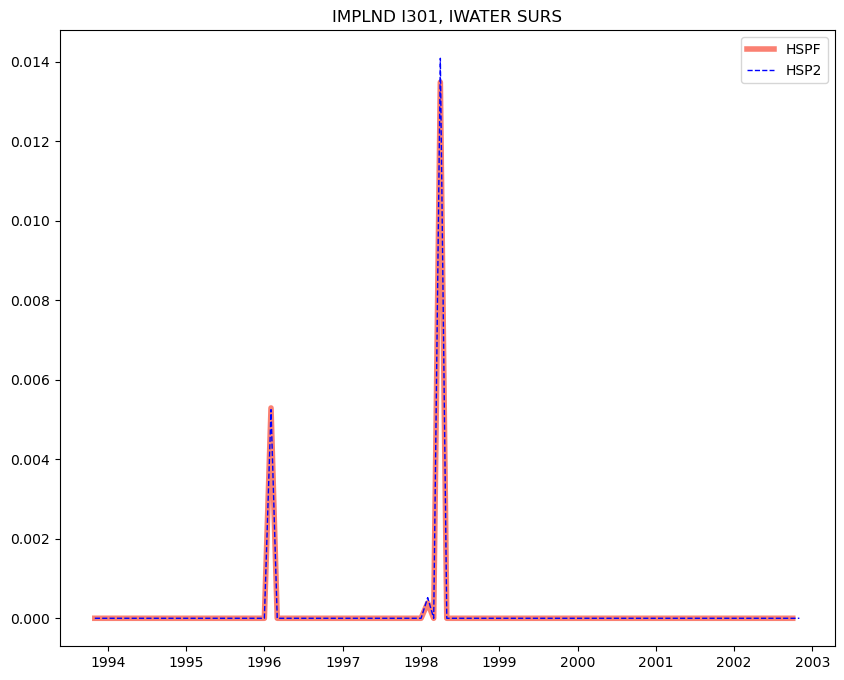

In [26]:
plot("IMPLND", ils, "IWATER", "SURS", "last")

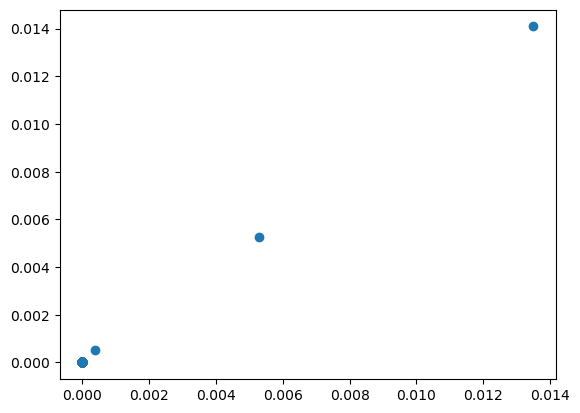

In [27]:
scatter("IMPLND", ils, "IWATER", "SURS", "last")

## Automate checking PERLNDs for PERO

In [28]:
perlndkeys = summary[(summary.Frequency == "Monthly") & (summary.Operation == "PERLND")]
perlndkeys[0:10]

Operation Activity segment Frequency      Shape  \
PERLND_PWATER_011_4    PERLND   PWATER      11   Monthly  (108, 27)   
PERLND_PWATER_012_4    PERLND   PWATER      12   Monthly  (108, 32)   
PERLND_PWATER_013_4    PERLND   PWATER      13   Monthly  (108, 32)   
PERLND_PWATER_014_4    PERLND   PWATER      14   Monthly  (108, 32)   
PERLND_PWATER_015_4    PERLND   PWATER      15   Monthly  (108, 32)   
PERLND_PWATER_021_4    PERLND   PWATER      21   Monthly  (108, 27)   
PERLND_PWATER_022_4    PERLND   PWATER      22   Monthly  (108, 32)   
PERLND_PWATER_023_4    PERLND   PWATER      23   Monthly  (108, 32)   
PERLND_PWATER_024_4    PERLND   PWATER      24   Monthly  (108, 32)   
PERLND_PWATER_025_4    PERLND   PWATER      25   Monthly  (108, 32)   

                         Start       Stop  
PERLND_PWATER_011_4 1993-11-01 2002-10-01  
PERLND_PWATER_012_4 1993-11-01 2002-10-01  
PERLND_PWATER_013_4 1993-11-01 2002-10-01  
PERLND_PWATER_014_4 1993-11-01 2002-10-01  
PERLND_PWATER_015_4 1993-11-01 2002-10-01  
PERLND_PWATER_021_4 1993-11-01 2002-10-01  
PERLND_PWATER_022_4 1993-11-01 2002-10-01  
PERLND_PWATER_023_4 1993-11-01 2002-10-01  
PERLND_PWATER_024_4 1993-11-01 2002-10-01  
PERLND_PWATER_025_4 1993-11-01 2002-10-01

In [29]:
delta = monthlyoutflow(perlndkeys, "PERO_sum")
delta

HSP2_SUM  HSPF_SUM  Percent diff  abs(Percent diff)
055   64.7859   64.7859       -0.0000             0.0000
051   10.1520   10.1520       -0.0000             0.0000
232   54.5515   54.5515        0.0000             0.0000
023   57.9035   57.9035        0.0000             0.0000
071   13.8709   13.8709        0.0000             0.0000
013   55.6965   55.6965        0.0000             0.0000
222   45.9145   45.9145        0.0000             0.0000
082   45.8386   45.8386        0.0000             0.0000
226   29.4270   29.4270        0.0000             0.0000
184   52.1066   52.1066       -0.0000             0.0000
291   31.4601   31.4601       -0.0000             0.0000
075   73.6297   73.6297        0.0000             0.0000
304  104.4457  104.4457        0.0000             0.0000
256   21.2304   21.2304        0.0000             0.0000
074   70.8455   70.8455        0.0000             0.0000
285   97.2314   97.2314        0.0000             0.0000
124   56.8129   56.8129       -0.0000             0.0000
175   56.6028   56.6028       -0.0000             0.0000
254   46.5186   46.5186       -0.0000             0.0000
172   36.9647   36.9646       -0.0000             0.0000
181    6.0741    6.0741        0.0000             0.0000
235   85.6543   85.6543       -0.0000             0.0000
135   49.4472   49.4472       -0.0000             0.0000
073   65.6017   65.6017       -0.0000             0.0000
201   10.9715   10.9715       -0.0000             0.0000
121    7.9901    7.9901        0.0000             0.0000
281   12.5471   12.5471       -0.0000             0.0000
295  121.6002  121.6003        0.0000             0.0000
072   54.2092   54.2092        0.0000             0.0000
255   48.7199   48.7198       -0.0000             0.0000
221   10.2781   10.2781       -0.0000             0.0000
292   88.3961   88.3961       -0.0000             0.0000
062   48.5426   48.5426       -0.0000             0.0000
275   44.8519   44.8519        0.0000             0.0000
014   58.5426   58.5426       -0.0000             0.0000
225   70.3941   70.3940       -0.0000             0.0000
102   37.5410   37.5410       -0.0000             0.0000
042   54.4023   54.4023       -0.0000             0.0000
025   65.9857   65.9857       -0.0000             0.0000
305  108.6897  108.6897       -0.0000             0.0000
085   64.7964   64.7964       -0.0000             0.0000
022   46.3543   46.3543       -0.0000             0.0000
052   46.1781   46.1781       -0.0000             0.0000
031   18.2778   18.2778        0.0000             0.0000
211    4.6437    4.6437       -0.0000             0.0000
043   63.0228   63.0228       -0.0000             0.0000
164   49.3031   49.3031        0.0000             0.0000
293  108.5104  108.5104       -0.0000             0.0000
174   53.8139   53.8139       -0.0000             0.0000
133   43.1818   43.1818       -0.0000             0.0000
141    6.6902    6.6902       -0.0000             0.0000
091   13.2223   13.2223       -0.0000             0.0000
015   61.9178   61.9177       -0.0000             0.0000
191   12.4472   12.4472        0.0000             0.0000
224   66.8366   66.8366       -0.0000             0.0000
024   62.4759   62.4759       -0.0000             0.0000
252   33.3730   33.3730        0.0000             0.0000
241    9.4750    9.4750       -0.0000             0.0000
302   77.3120   77.3120       -0.0000             0.0000
122   39.3604   39.3604        0.0000             0.0000
132   34.4520   34.4520       -0.0000             0.0000
202   47.1175   47.1175        0.0000             0.0000
081   10.2268   10.2268        0.0000             0.0000
212   26.9619   26.9620        0.0000             0.0000
294  117.4441  117.4440       -0.0000             0.0000
272   34.2029   34.2030        0.0000             0.0000
276   20.0781   20.0781       -0.0000             0.0000
206   28.4453   28.4453       -0.0000             0.0000
054   62.4308   62.4308        0.0000             0.0000
011   10.5855  

Look at the statistics for the percent difference column

In [30]:
delta.describe()

HSP2_SUM  HSPF_SUM  Percent diff  abs(Percent diff)
count  129.0000  129.0000      129.0000           129.0000
mean    45.5122   45.5122       -0.0000             0.0001
std     26.6657   26.6657        0.0001             0.0000
min      4.6437    4.6437       -0.0003             0.0000
25%     26.9619   26.9620       -0.0001             0.0000
50%     46.7790   46.7790       -0.0000             0.0000
75%     61.3993   61.3994        0.0000             0.0001
max    121.6002  121.6003        0.0002             0.0003

<Axes: >

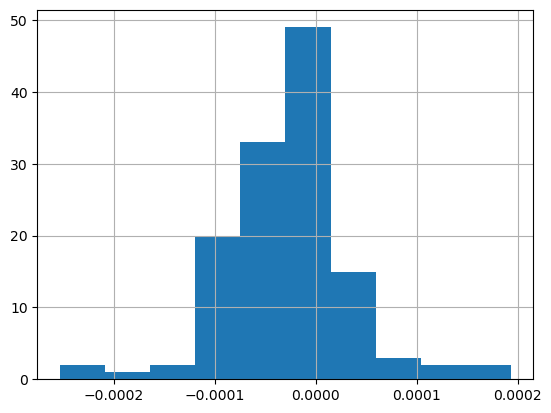

In [31]:
delta["Percent diff"].hist()

In [32]:
pls = delta.index[-1]
print("WORST PERLND SEGMENT IS", pls)

WORST PERLND SEGMENT IS 125


#### PERLND PWATER AGWLI

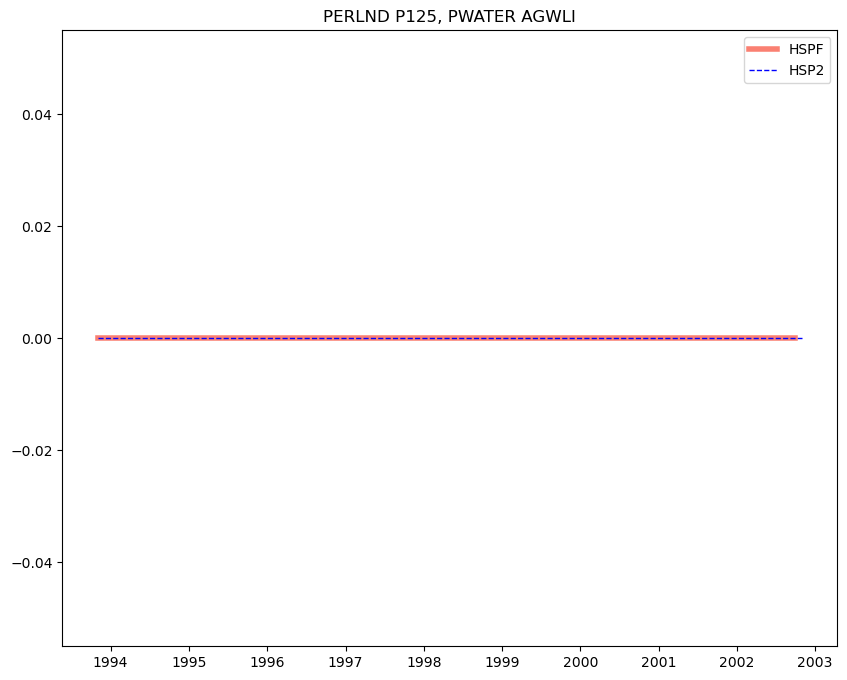

In [33]:
plot("PERLND", pls, "PWATER", "AGWLI", "sum")

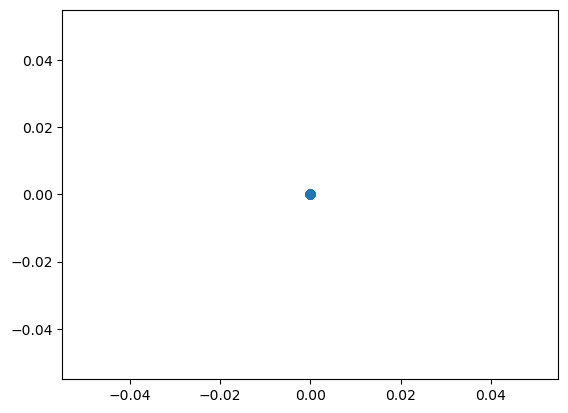

In [34]:
scatter("PERLND", pls, "PWATER", "AGWLI", "sum")

#### PERLND PWATER SURLI

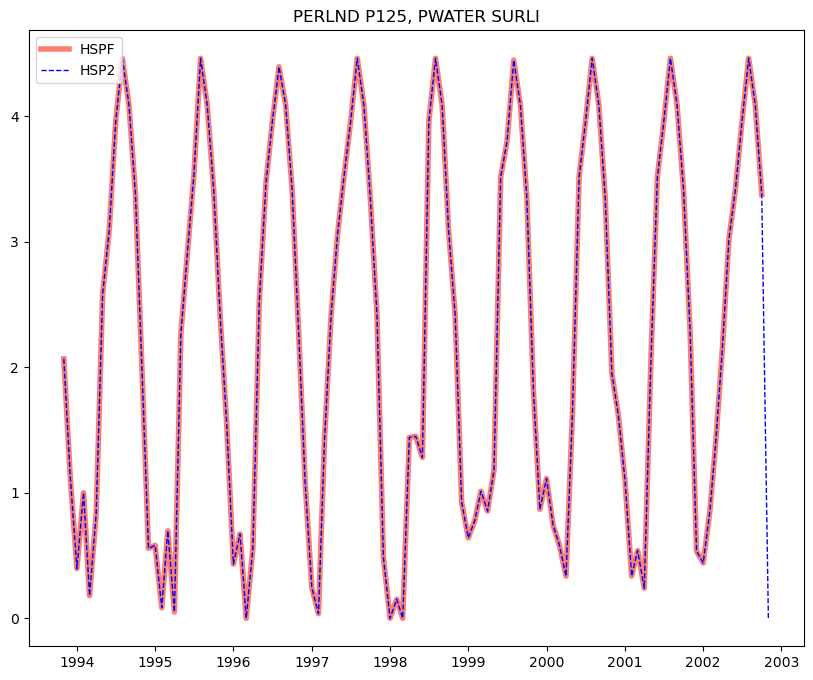

In [35]:
plot("PERLND", pls, "PWATER", "SURLI", "sum")

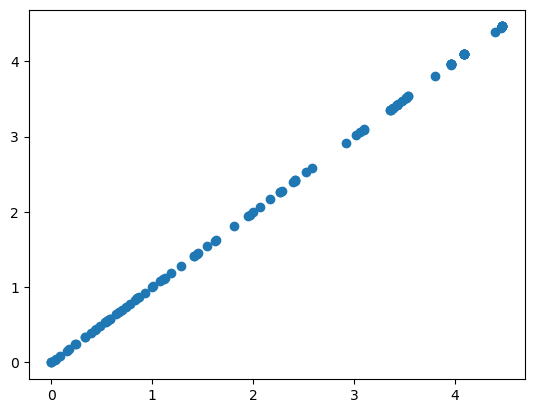

In [36]:
scatter("PERLND", pls, "PWATER", "SURLI", "sum")

#### PERLND PWATER AGWO

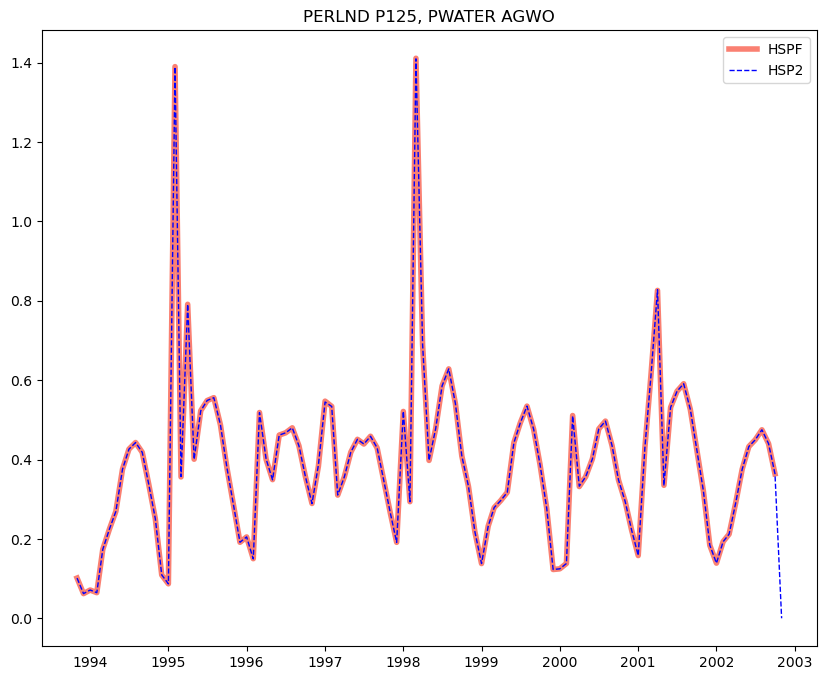

In [37]:
plot("PERLND", pls, "PWATER", "AGWO", "sum")

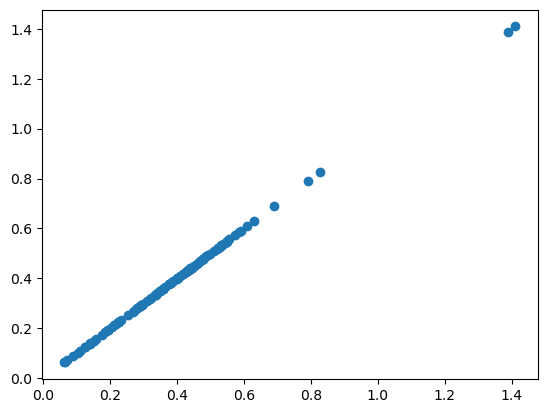

In [38]:
scatter("PERLND", pls, "PWATER", "AGWO", "sum")

#### PERLND PWATER BASET

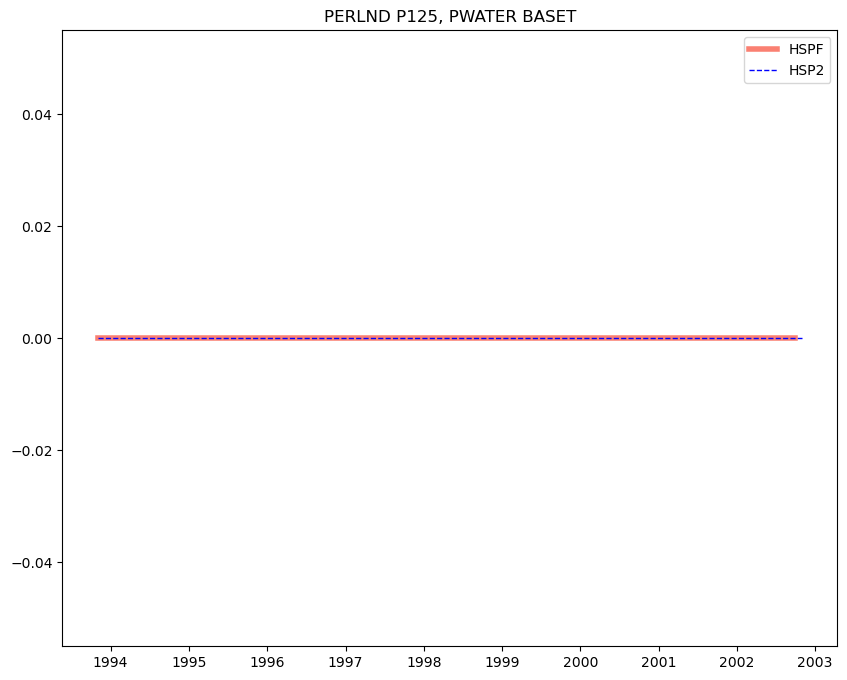

In [39]:
plot("PERLND", pls, "PWATER", "BASET", "sum")

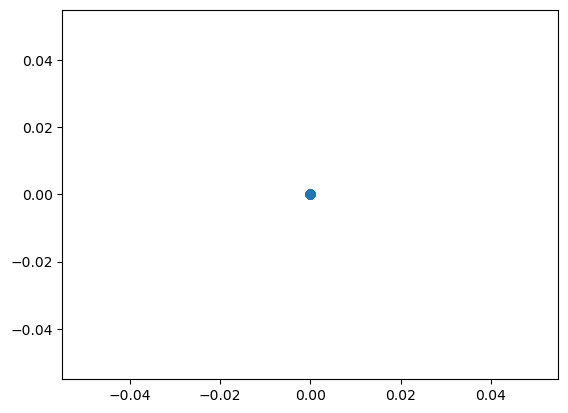

In [40]:
scatter("PERLND", pls, "PWATER", "BASET", "sum")

##### PERLND PWATER CEPE

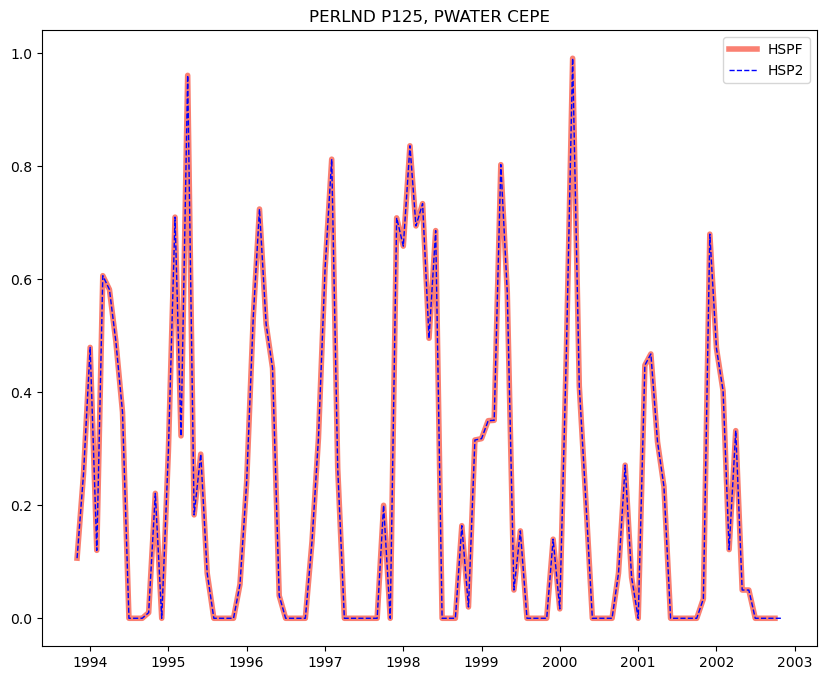

In [41]:
plot("PERLND", pls, "PWATER", "CEPE", "sum")

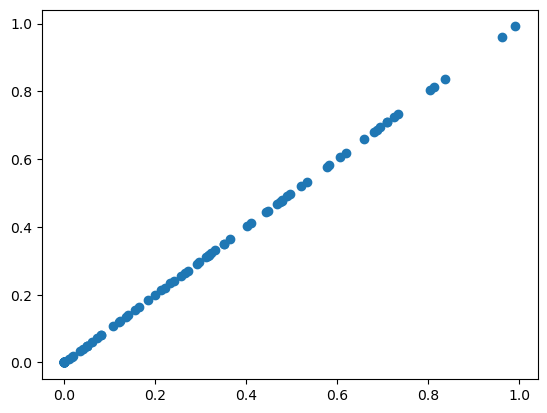

In [42]:
scatter("PERLND", pls, "PWATER", "CEPE", "sum")

#### PERLND PWATER IFWI

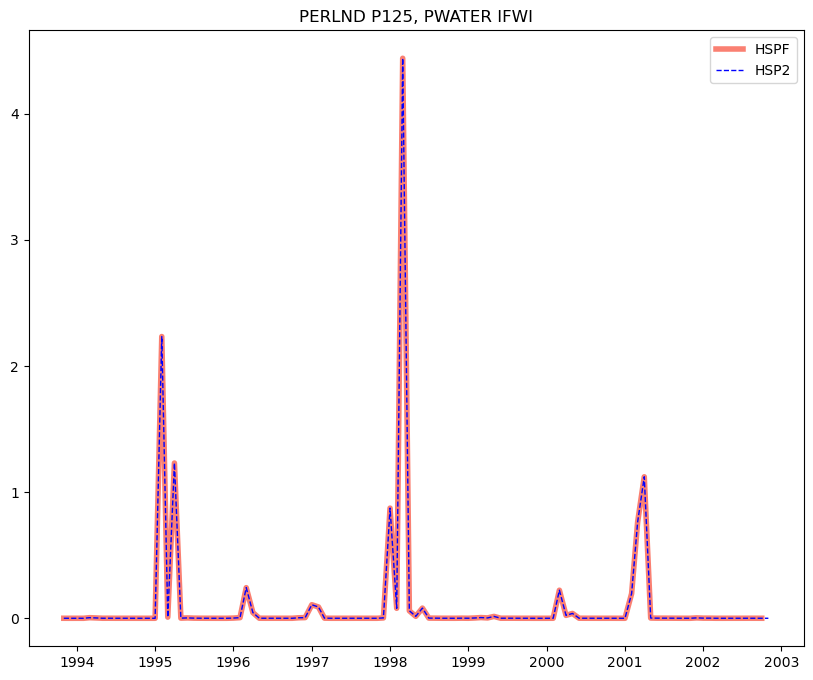

In [43]:
plot("PERLND", pls, "PWATER", "IFWI", "sum")

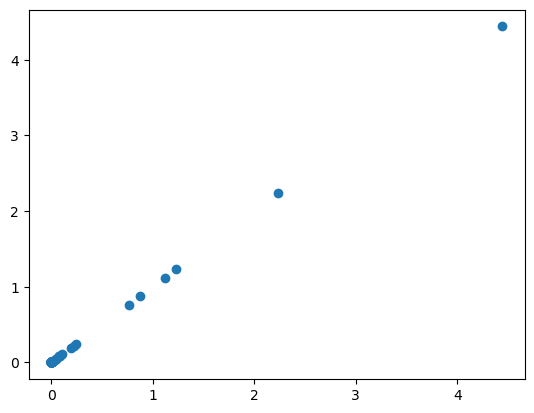

In [44]:
scatter("PERLND", pls, "PWATER", "IFWI", "sum")

#### PERLND PWATER IFWO

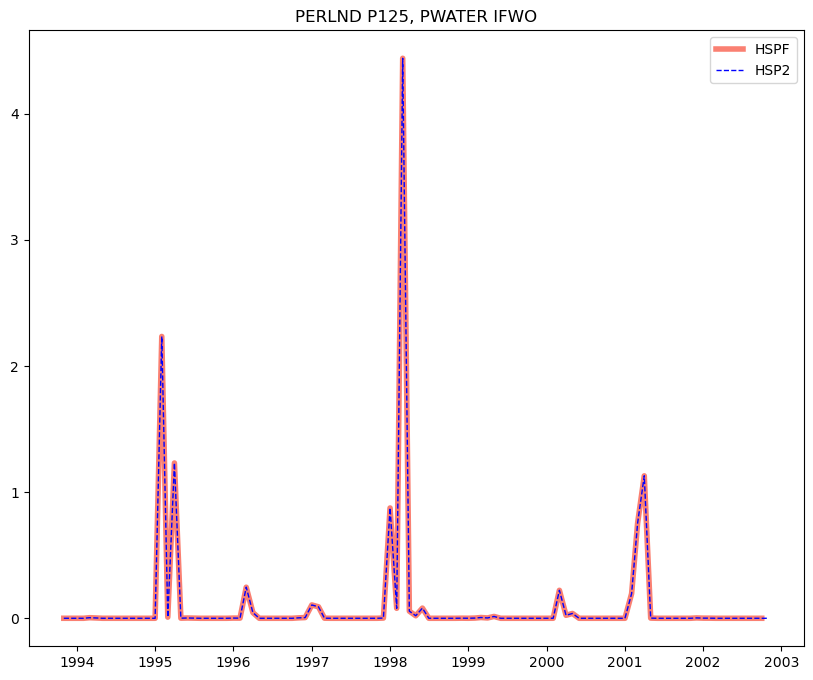

In [45]:
plot("PERLND", pls, "PWATER", "IFWO", "sum")

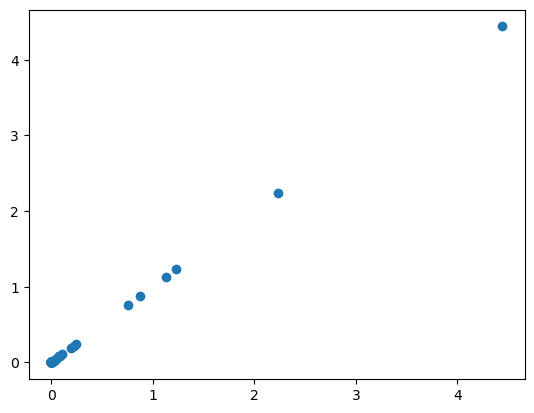

In [46]:
scatter("PERLND", pls, "PWATER", "IFWO", "sum")

#### PERLND PWATER IGWI

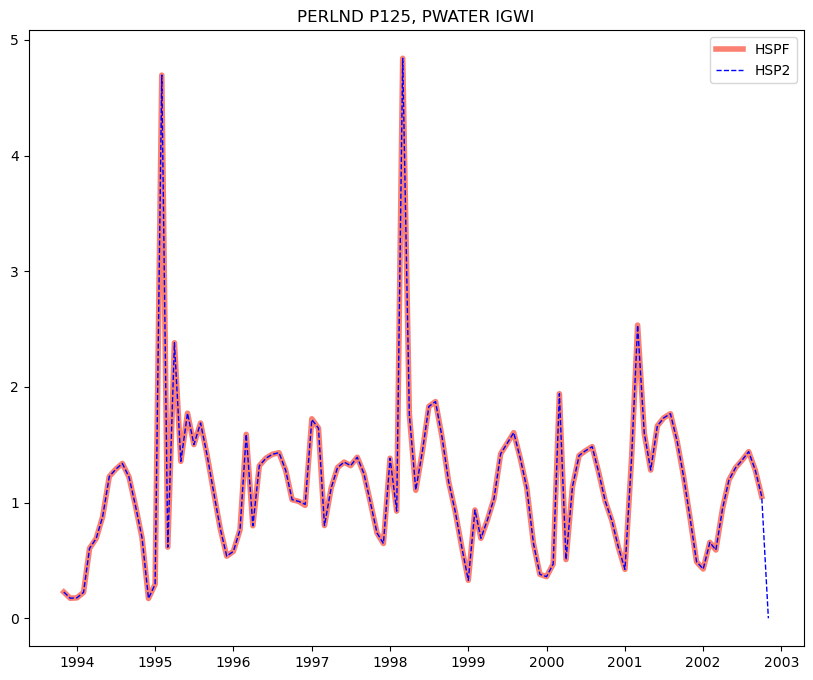

In [47]:
plot("PERLND", pls, "PWATER", "IGWI", "sum")

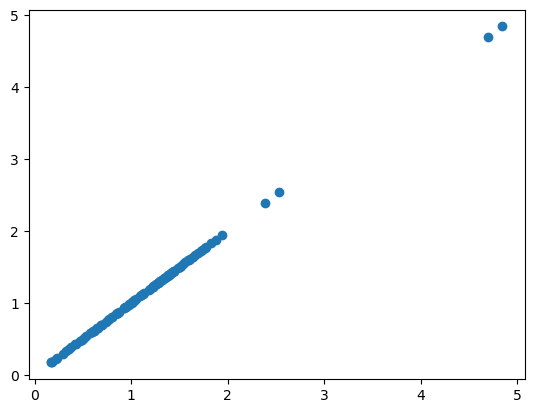

In [48]:
scatter("PERLND", pls, "PWATER", "IGWI", "sum")

#### PERLND PWATER INFIL

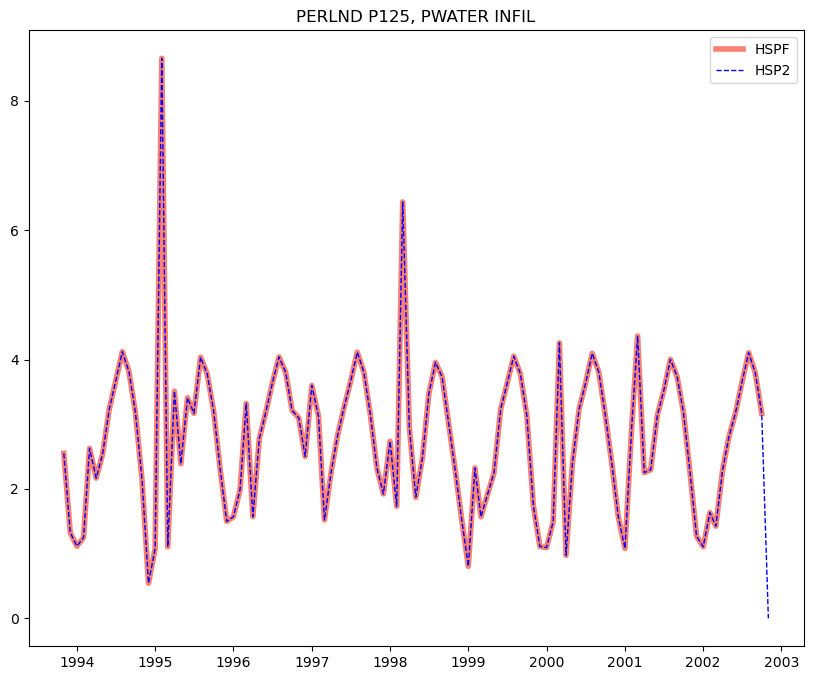

In [49]:
plot("PERLND", pls, "PWATER", "INFIL", "sum")

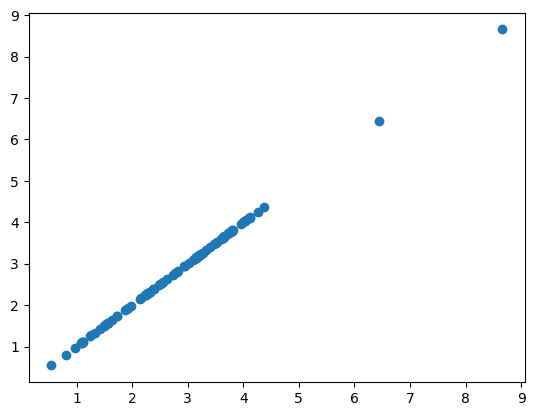

In [50]:
scatter("PERLND", pls, "PWATER", "INFIL", "sum")

#### PERLND PWATER LZET

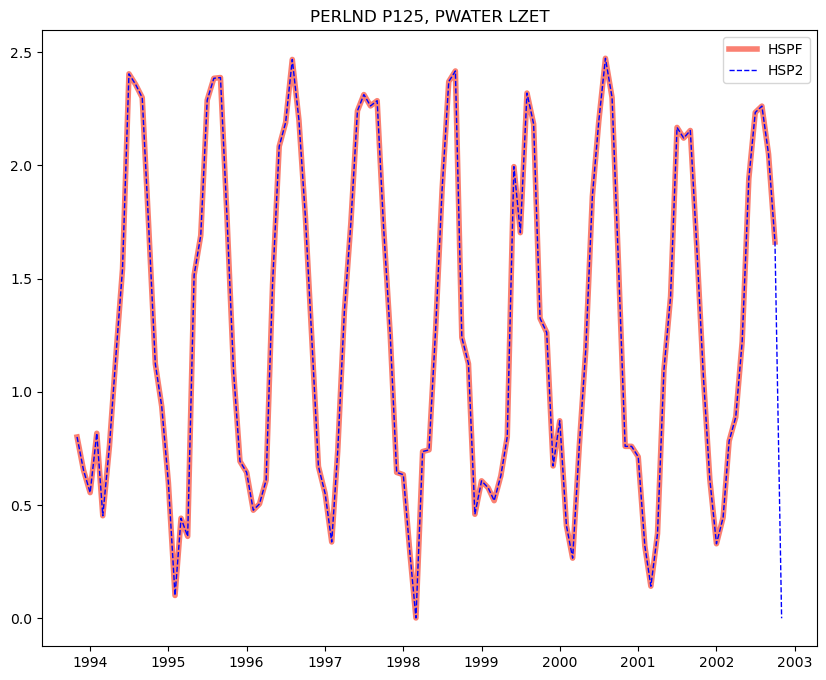

In [51]:
plot("PERLND", pls, "PWATER", "LZET", "sum")

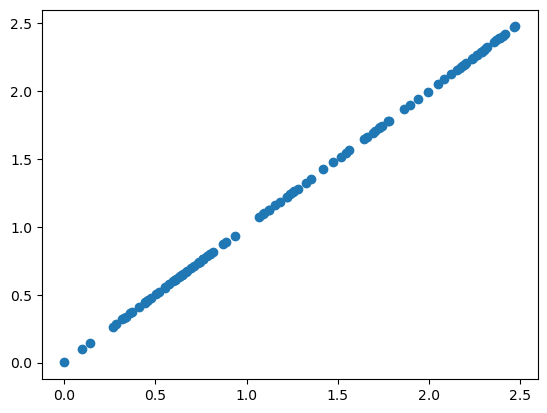

In [52]:
scatter("PERLND", pls, "PWATER", "LZET", "sum")

#### PERLND PWATER PERC

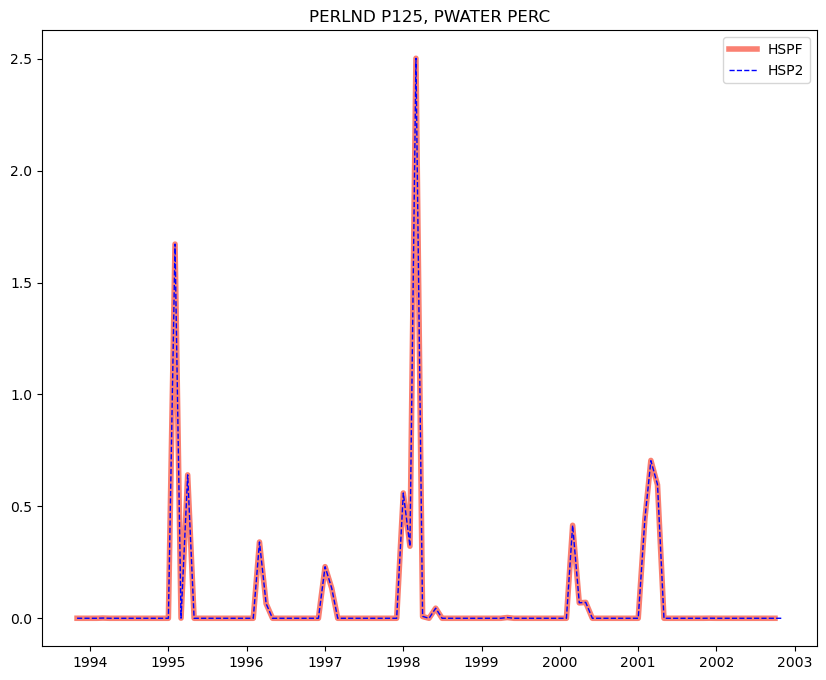

In [53]:
plot("PERLND", pls, "PWATER", "PERC", "sum")

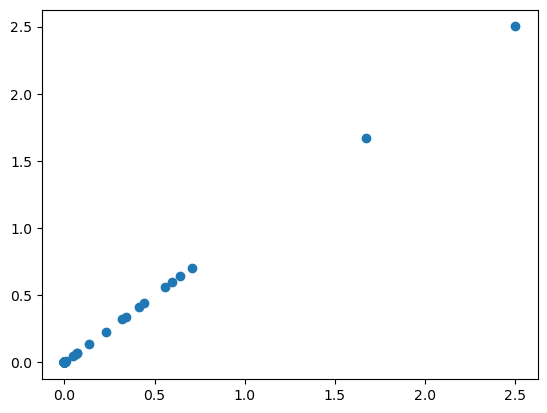

In [54]:
scatter("PERLND", pls, "PWATER", "PERC", "sum")

#### PERLND PWATER PERO

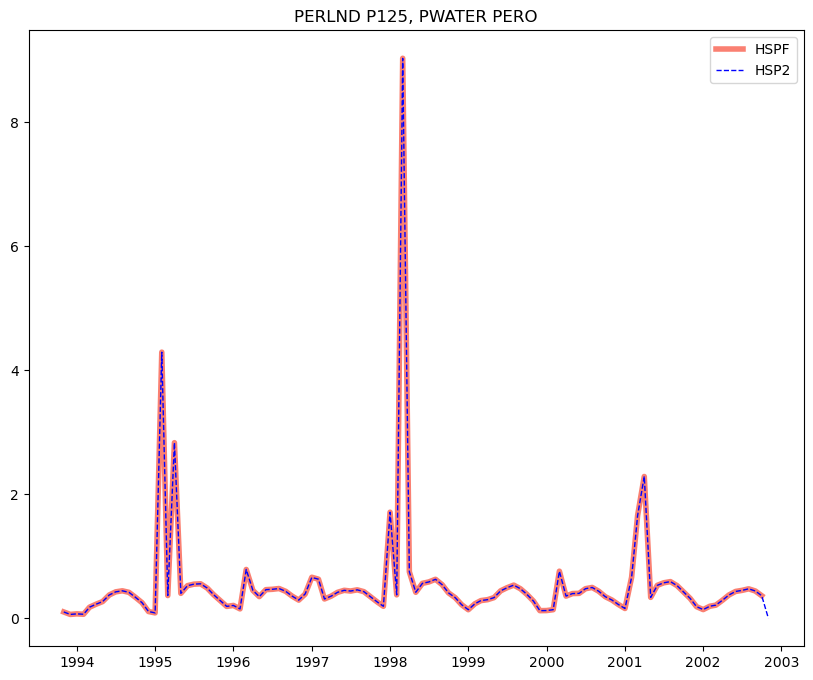

In [55]:
plot("PERLND", pls, "PWATER", "PERO", "sum")

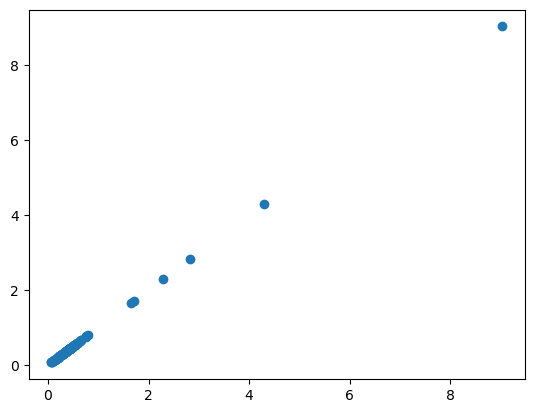

In [56]:
scatter("PERLND", pls, "PWATER", "PERO", "sum")

#### PERLND PWATER PERS

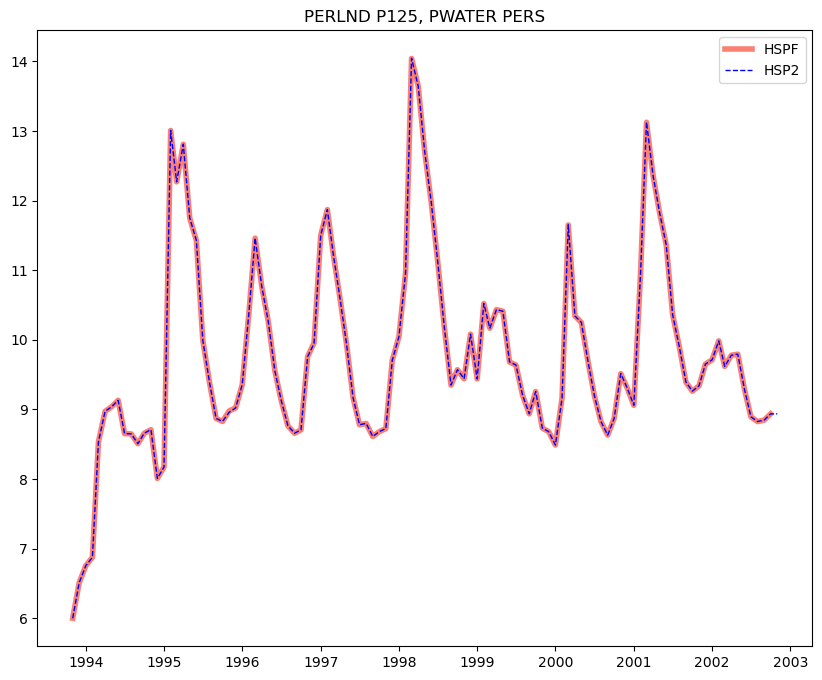

In [57]:
plot("PERLND", pls, "PWATER", "PERS", "last")

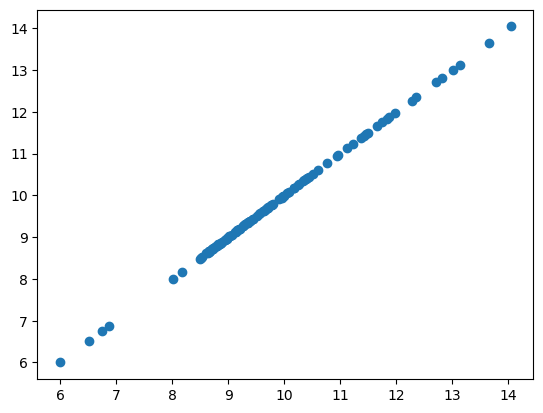

In [58]:
scatter("PERLND", pls, "PWATER", "PERS", "last")

#### PERLND PWATER PET, Monthly

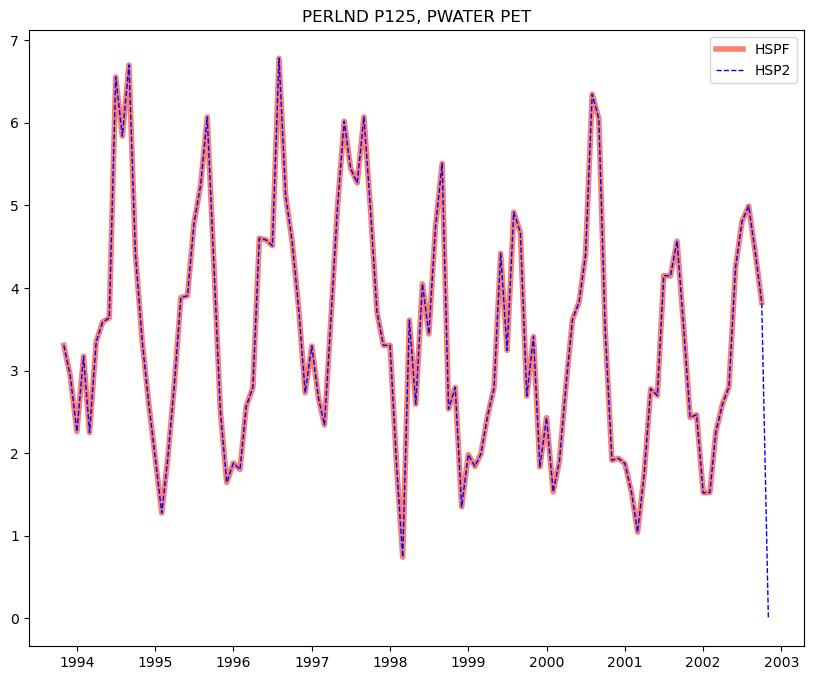

In [59]:
plot("PERLND", pls, "PWATER", "PET", "sum")

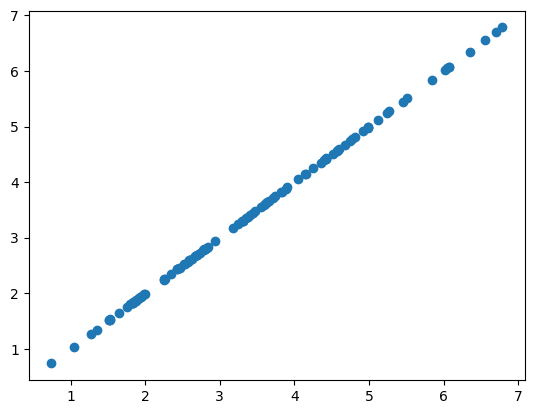

In [60]:
scatter("PERLND", pls, "PWATER", "PET", "sum")

#### PERLND PWATER SUPY

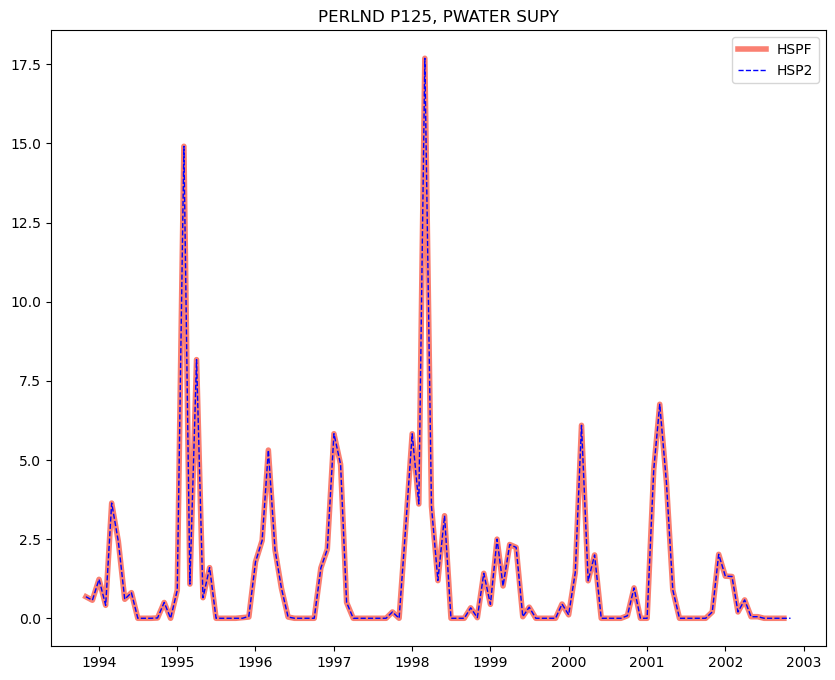

In [61]:
plot("PERLND", pls, "PWATER", "SUPY", "sum")

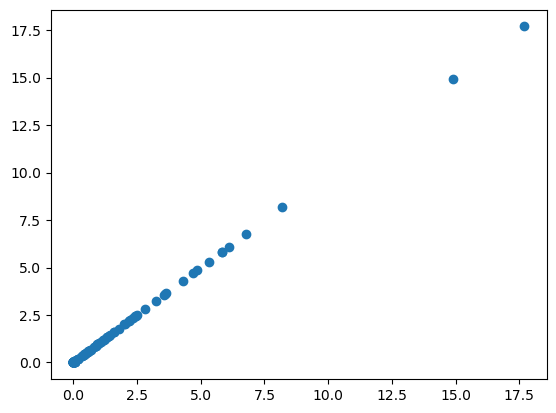

In [62]:
scatter("PERLND", pls, "PWATER", "SUPY", "sum")

#### PERLND PWATER SURO

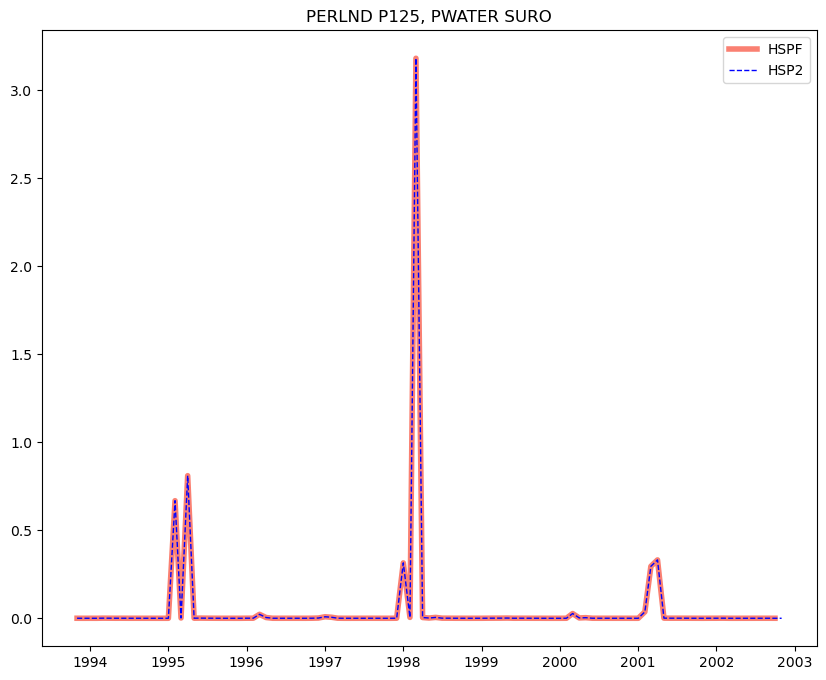

In [63]:
plot("PERLND", pls, "PWATER", "SURO", "sum")

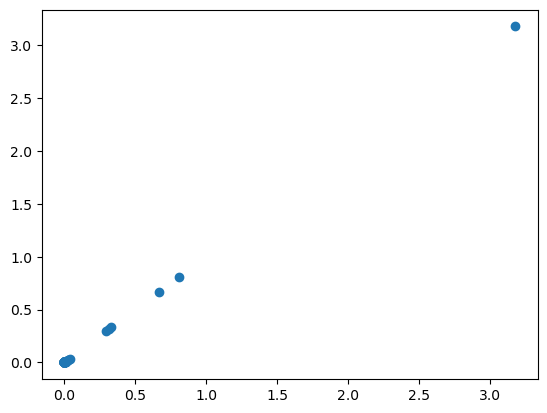

In [64]:
scatter("PERLND", pls, "PWATER", "SURO", "sum")

#### PERLND PWATER TAET

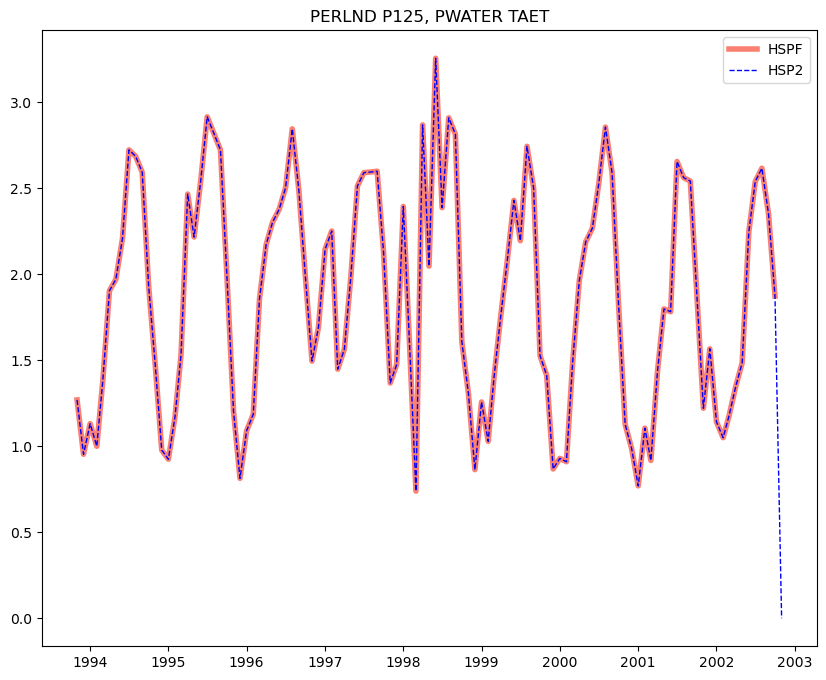

In [65]:
plot("PERLND", pls, "PWATER", "TAET", "sum")

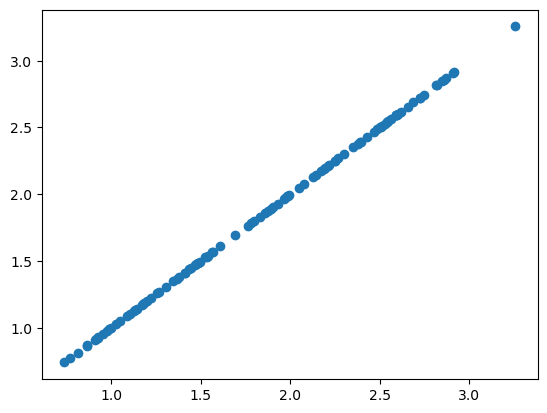

In [66]:
scatter("PERLND", pls, "PWATER", "TAET", "sum")

#### PERLND PWATER UZET

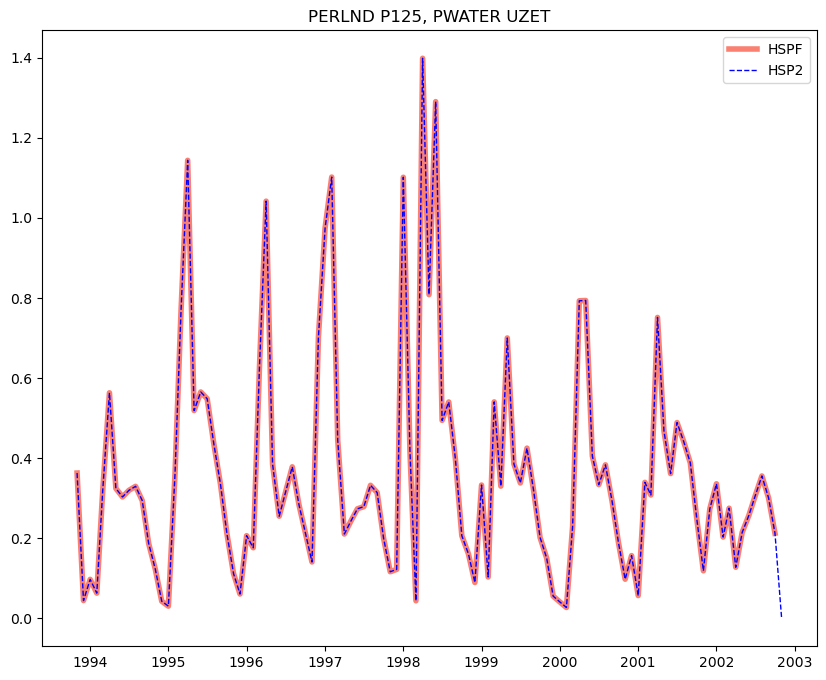

In [67]:
plot("PERLND", pls, "PWATER", "UZET", "sum")

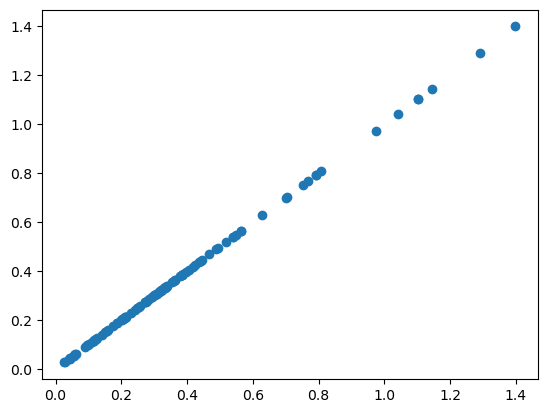

In [68]:
scatter("PERLND", pls, "PWATER", "UZET", "sum")

#### PERLND PWATER UZI

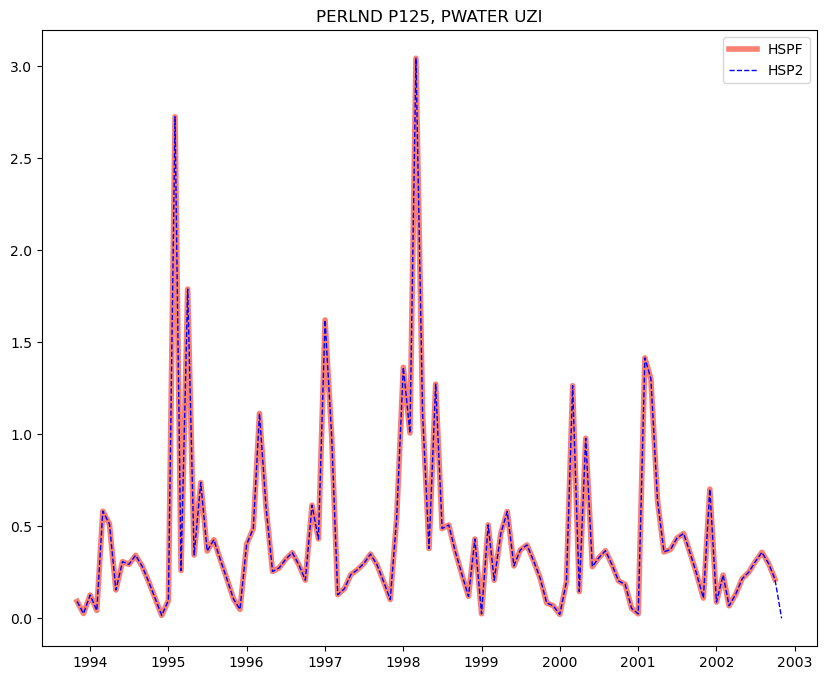

In [69]:
plot("PERLND", pls, "PWATER", "UZI", "sum")

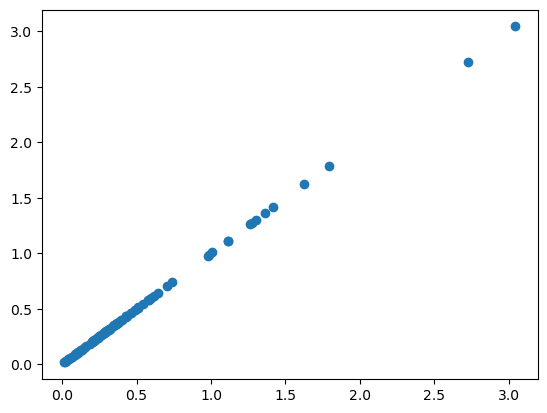

In [70]:
scatter("PERLND", pls, "PWATER", "UZI", "sum")

## RCHRES

In [71]:
rchreskeys = summary[(summary.Frequency == "Monthly") & (summary.Operation == "RCHRES")]
rchreskeys[0:10]

Operation Activity segment Frequency      Shape      Start  \
RCHRES_HYDR_001_4    RCHRES     HYDR       1   Monthly  (108, 17) 1993-11-01   
RCHRES_HYDR_021_4    RCHRES     HYDR      21   Monthly  (108, 17) 1993-11-01   
RCHRES_HYDR_022_4    RCHRES     HYDR      22   Monthly  (108, 17) 1993-11-01   
RCHRES_HYDR_023_4    RCHRES     HYDR      23   Monthly  (108, 17) 1993-11-01   
RCHRES_HYDR_011_4    RCHRES     HYDR      11   Monthly  (108, 17) 1993-11-01   
RCHRES_HYDR_024_4    RCHRES     HYDR      24   Monthly  (108, 17) 1993-11-01   
RCHRES_HYDR_031_4    RCHRES     HYDR      31   Monthly  (108, 17) 1993-11-01   
RCHRES_HYDR_071_4    RCHRES     HYDR      71   Monthly  (108, 17) 1993-11-01   
RCHRES_HYDR_043_4    RCHRES     HYDR      43   Monthly  (108, 17) 1993-11-01   
RCHRES_HYDR_041_4    RCHRES     HYDR      41   Monthly  (108, 17) 1993-11-01   

                        Stop  
RCHRES_HYDR_001_4 2002-10-01  
RCHRES_HYDR_021_4 2002-10-01  
RCHRES_HYDR_022_4 2002-10-01  
RCHRES_HYDR_023_4 2002-10-01  
RCHRES_HYDR_011_4 2002-10-01  
RCHRES_HYDR_024_4 2002-10-01  
RCHRES_HYDR_031_4 2002-10-01  
RCHRES_HYDR_071_4 2002-10-01  
RCHRES_HYDR_043_4 2002-10-01  
RCHRES_HYDR_041_4 2002-10-01

In [72]:
delta = monthlyoutflow(rchreskeys, "ROVOL_sum")
delta

HSP2_SUM    HSPF_SUM  Percent diff  abs(Percent diff)
525    755.3912    755.3912        0.0000             0.0000
504  72021.9531  72021.9519       -0.0000             0.0000
502  19465.1582  19465.1591        0.0000             0.0000
195   5182.8628   5182.8634        0.0000             0.0000
193   4381.4736   4381.4730       -0.0000             0.0000
401  24895.3984  24895.4035        0.0000             0.0000
064    659.7576    659.7574       -0.0000             0.0000
952    709.6678    709.6680        0.0000             0.0000
964    754.5002    754.5005        0.0000             0.0000
521  27894.3848  27894.3957        0.0000             0.0000
503  58696.6094  58696.5834       -0.0000             0.0000
402  54092.2422  54092.2170       -0.0000             0.0000
513   2387.7192   2387.7180       -0.0001             0.0001
043   2826.3008   2826.2993       -0.0001             0.0001
431 122787.2812 122787.3503        0.0001             0.0001
042   1649.1659   1649.1648       -0.0001             0.0001
082  10818.1582  10818.1500       -0.0001             0.0001
065   5130.6030   5130.5989       -0.0001             0.0001
514   1164.7094   1164.7084       -0.0001             0.0001
542  46246.4961  46246.4583       -0.0001             0.0001
041   1284.5618   1284.5606       -0.0001             0.0001
201 222791.8438 222791.6388       -0.0001             0.0001
422   4786.9673   4786.9627       -0.0001             0.0001
524    502.1087    502.1082       -0.0001             0.0001
421   4785.9292   4785.9245       -0.0001             0.0001
092  10395.0420  10395.0314       -0.0001             0.0001
443   3280.6895   3280.6860       -0.0001             0.0001
051    549.0591    549.0597        0.0001             0.0001
045   7854.1572   7854.1480       -0.0001             0.0001
044   5409.5815   5409.5752       -0.0001             0.0001
526    534.6501    534.6494       -0.0001             0.0001
081    894.3219    894.3231        0.0001             0.0001
442  21559.5098  21559.5406        0.0001             0.0001
441   8057.0610   8057.0494       -0.0001             0.0001
046  16087.8145  16087.7906       -0.0001             0.0001
101   1838.9606   1838.9578       -0.0002             0.0002
501   8593.0928   8593.0796       -0.0002             0.0002
311    567.3905    567.3896       -0.0002             0.0002
052   4096.2021   4096.1956       -0.0002             0.0002
107   6026.4937   6026.4840       -0.0002             0.0002
510    737.4307    737.4294       -0.0002             0.0002
423  29856.0137  29856.0651        0.0002             0.0002
011   4362.4326   4362.4249       -0.0002             0.0002
523    520.5114    520.5123        0.0002             0.0002
500    897.5441    897.5425       -0.0002             0.0002
411  13728.8311  13728.8047       -0.0002             0.0002
404 214783.8438 214784.2646        0.0002             0.0002
002  15997.4150  15997.3832       -0.0002             0.0002
505 142266.2969 142266.5846        0.0002             0.0002
231   6698.2578   6698.2442       -0.0002             0.0002
001   4438.9297   4438.9206       -0.0002             0.0002
541  19720.7422  19720.7013       -0.0002             0.0002
405 241551.7031 241552.2136        0.0002             0.0002
408 282911.0938 282911.7119        0.0002             0.0002
233   8076.3672   8076.3495       -0.0002             0.0002
241   4744.5142   4744.5037       -0.0002             0.0002
242   4738.8394   4738.8287       -0.0002             0.0002
232   6702.0850   6702.0697       -0.0002             0.0002
307 628906.0625 628904.6303       -0.0002             0.0002
061     50.7809     50.7808       -0.0002             0.0002
407 254031.4219 254032.0347        0.0002             0.0002
511   8180.4258   8180.4057       -0.0002             0.0002
091   2232.9431   2232.9375       -0.0002             0.0002
212   7844.9951   7845.0148        0.0003             0.0003
243   4841.0269   4841.0147       -0.0003 

Look at the statistics for the percent difference column

In [73]:
delta.describe()

HSP2_SUM    HSPF_SUM  Percent diff  abs(Percent diff)
count    119.0000    119.0000      119.0000           119.0000
mean   60604.3320  60604.4235        0.0008             0.0013
std   109767.7422 109767.6913        0.0038             0.0036
min       50.7809     50.7808       -0.0045             0.0000
25%     2607.0100   2607.0087       -0.0003             0.0001
50%     8044.9546   8044.9289       -0.0001             0.0002
75%    56394.4258  56394.4002        0.0002             0.0006
max   628906.0625 628904.6303        0.0205             0.0205

<Axes: >

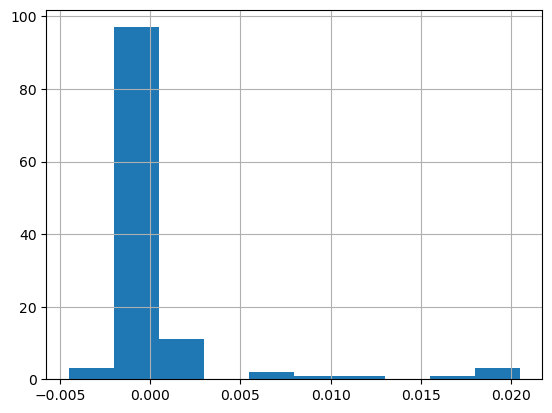

In [74]:
delta["Percent diff"].hist()

In [75]:
rid = delta.index[-1]
print("WORST RCHRES SEGMENT IS", rid)

WORST RCHRES SEGMENT IS 225


#### RCHRES HYDR IVOL

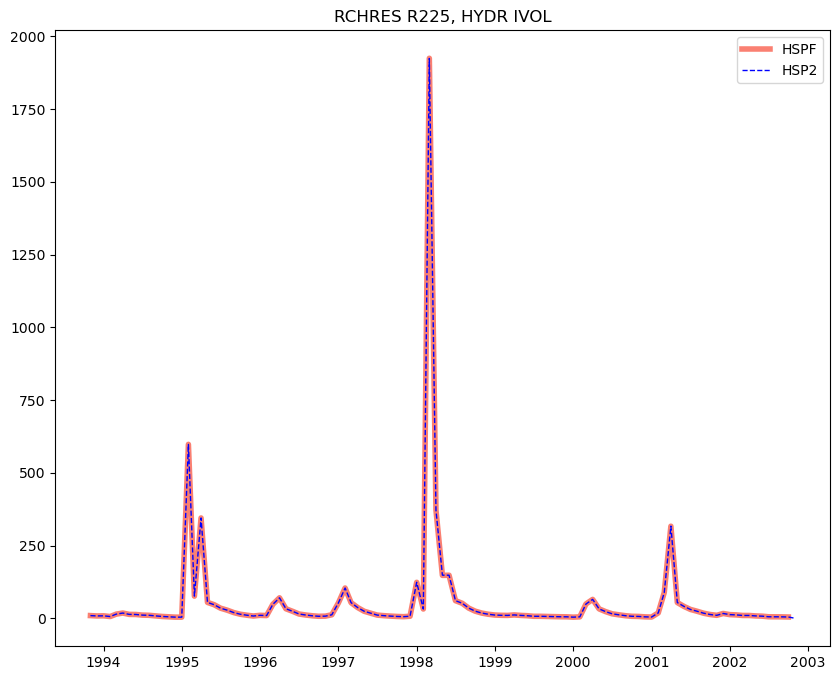

In [76]:
plot("RCHRES", rid, "HYDR", "IVOL", "sum")

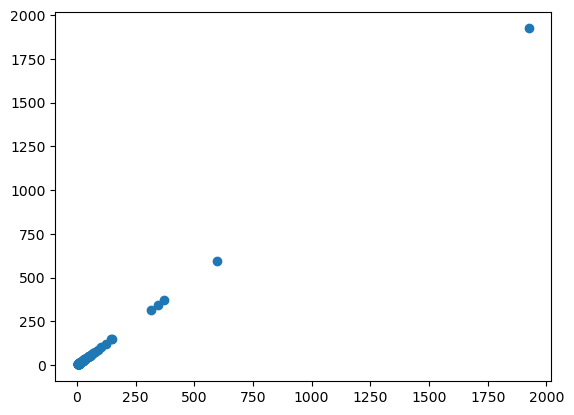

In [77]:
scatter("RCHRES", rid, "HYDR", "IVOL", "sum")

#### RCHRES HYDR PRSUPY

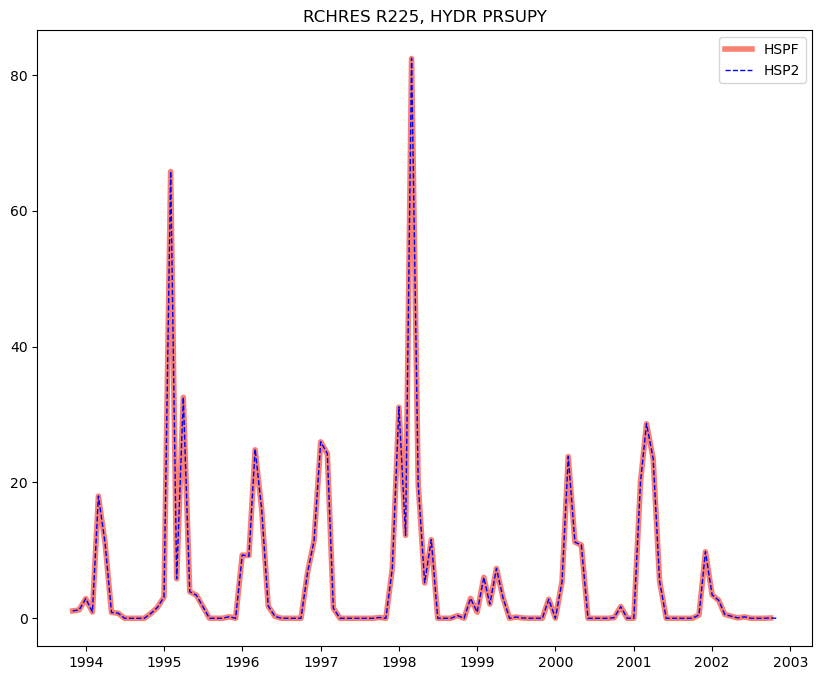

In [78]:
plot("RCHRES", rid, "HYDR", "PRSUPY", "sum")

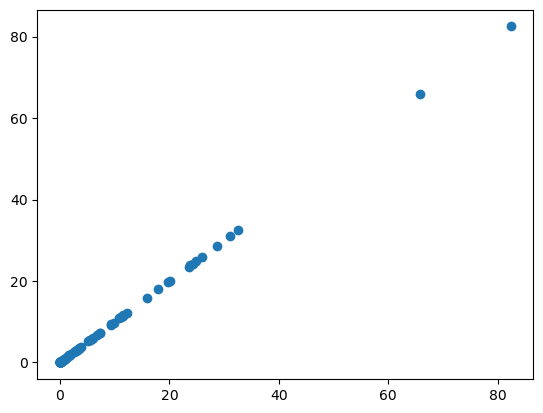

In [79]:
scatter("RCHRES", rid, "HYDR", "PRSUPY", "sum")

#### RCHRES HYDR ROVOL

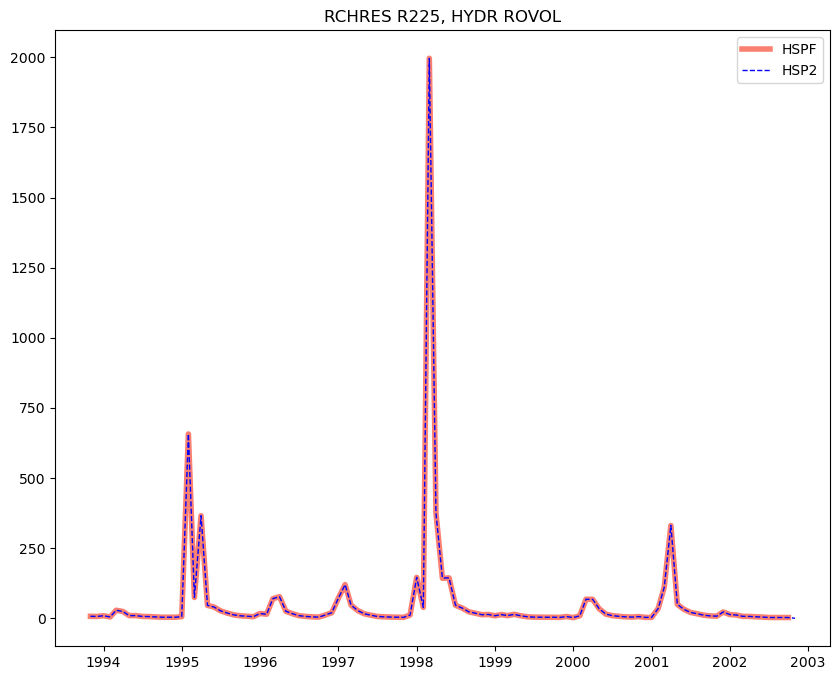

In [80]:
plot("RCHRES", rid, "HYDR", "ROVOL", "sum")

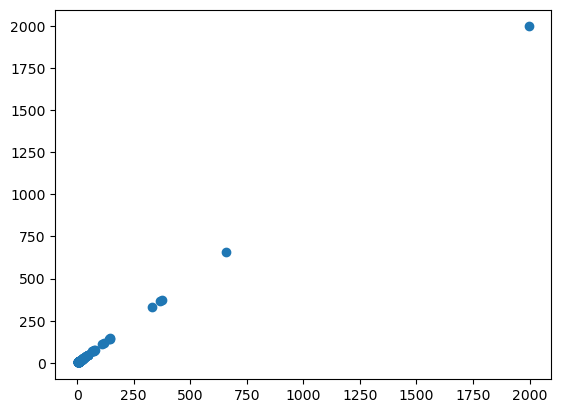

In [81]:
scatter("RCHRES", rid, "HYDR", "ROVOL", "sum")

#### RCHRES HYDR VOL

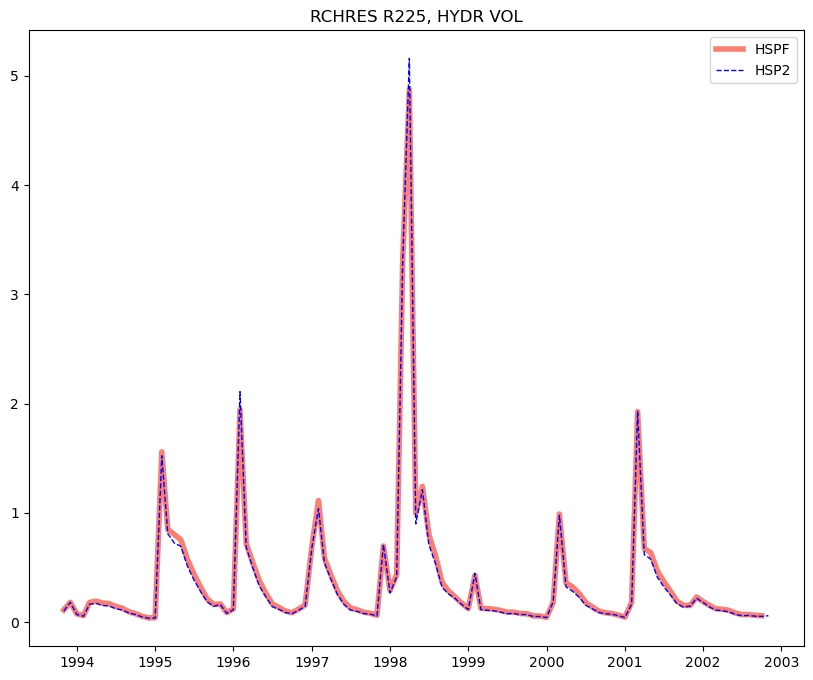

In [82]:
plot("RCHRES", rid, "HYDR", "VOL", "last")

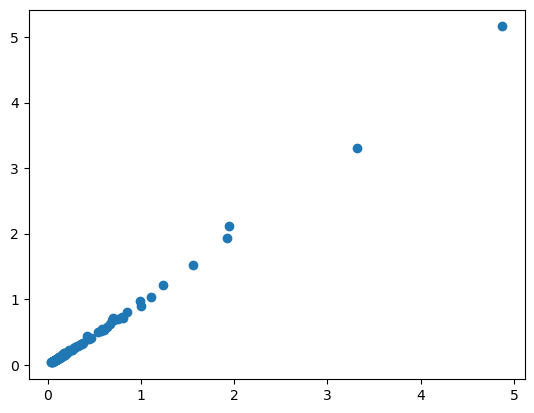

In [83]:
scatter("RCHRES", rid, "HYDR", "VOL", "last")

#### RCHRES HYDR VOLEV

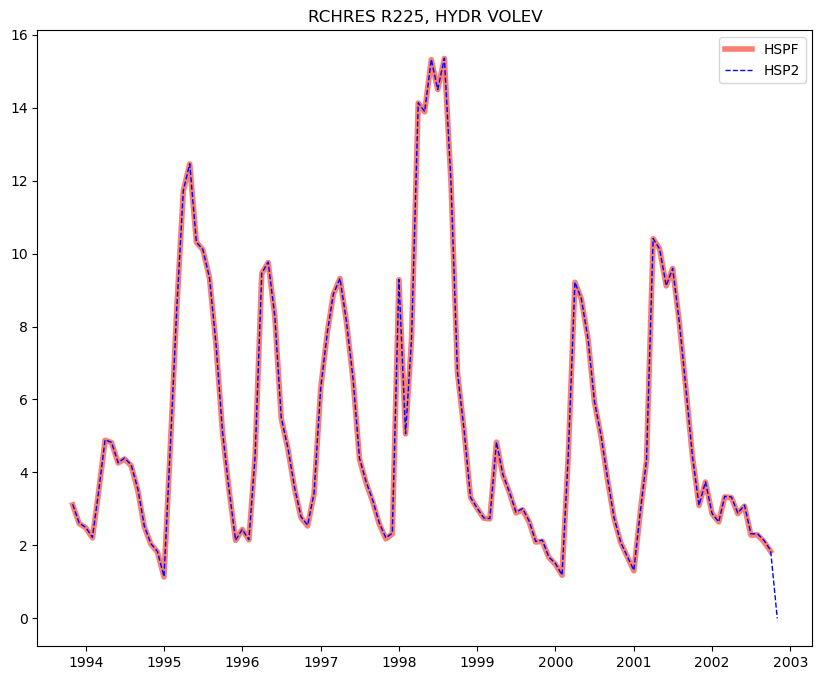

In [84]:
plot("RCHRES", rid, "HYDR", "VOLEV", "sum")

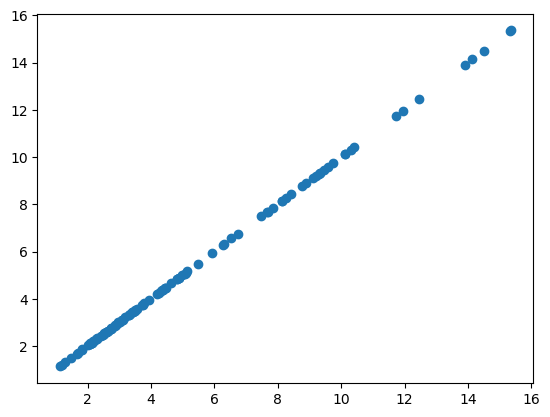

In [85]:
scatter("RCHRES", rid, "HYDR", "VOLEV", "sum")